In [1]:
## Load Configuration File

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import src.util as util
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTENC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# 1. Load Dataset

In [2]:
def load_dataset(config_data: dict) -> pd.DataFrame:
    # Load set of data
    x_train = util.pickle_load(config_data["train_set_path"][0])
    y_train = util.pickle_load(config_data["train_set_path"][1])

    x_valid = util.pickle_load(config_data["valid_set_path"][0])
    y_valid = util.pickle_load(config_data["valid_set_path"][1])

    x_test = util.pickle_load(config_data["test_set_path"][0])
    y_test = util.pickle_load(config_data["test_set_path"][1])

    # concatenate x and y each set
    train_set = pd.concat([x_train, y_train], axis = 1)
    valid_set = pd.concat([x_valid, y_valid], axis = 1)
    test_set = pd.concat([x_test, y_test], axis = 1)

    # return 3 set of data
    return train_set, valid_set, test_set

### Load Config Data

In [3]:
config_data = util.load_config()

### Load Dataset

In [4]:
train_set, valid_set, test_set = load_dataset(config_data)

# 2. Exploratory Data Analysis

## 2.1 Handling Imbalance Data

In [5]:
x_train = util.pickle_load(config_data["train_set_path"][0])
y_train = util.pickle_load(config_data["train_set_path"][1])

In [6]:
# Using SMOTENC and Oversampling
def balancing(x_data, y_data):
    x_set_num = x_data[config_data['int32_col']]
    x_set_cat = x_data[config_data['object_predictor']]
    x_train_new = pd.concat([x_set_num, x_set_cat], axis=1)

    sm = SMOTENC(random_state=42, categorical_features = list(range(len(x_set_num.columns),32)))

    x_over, y_over = RandomOverSampler(random_state=42).fit_resample(x_data, y_data)
    x_smote, y_smote = sm.fit_resample(x_train_new, y_data)

    train_set_smote = pd.concat([x_smote, y_smote], axis = 1)
    train_set_over = pd.concat([x_over, y_over], axis = 1)

    return train_set_smote, train_set_over

In [7]:
train_set_smote, train_set_over = balancing(x_train, y_train)

In [8]:
## Check balanced dataset
train_set_smote[config_data["label"]].value_counts(normalize=True)

N    0.5
Y    0.5
Name: fraud_reported, dtype: float64

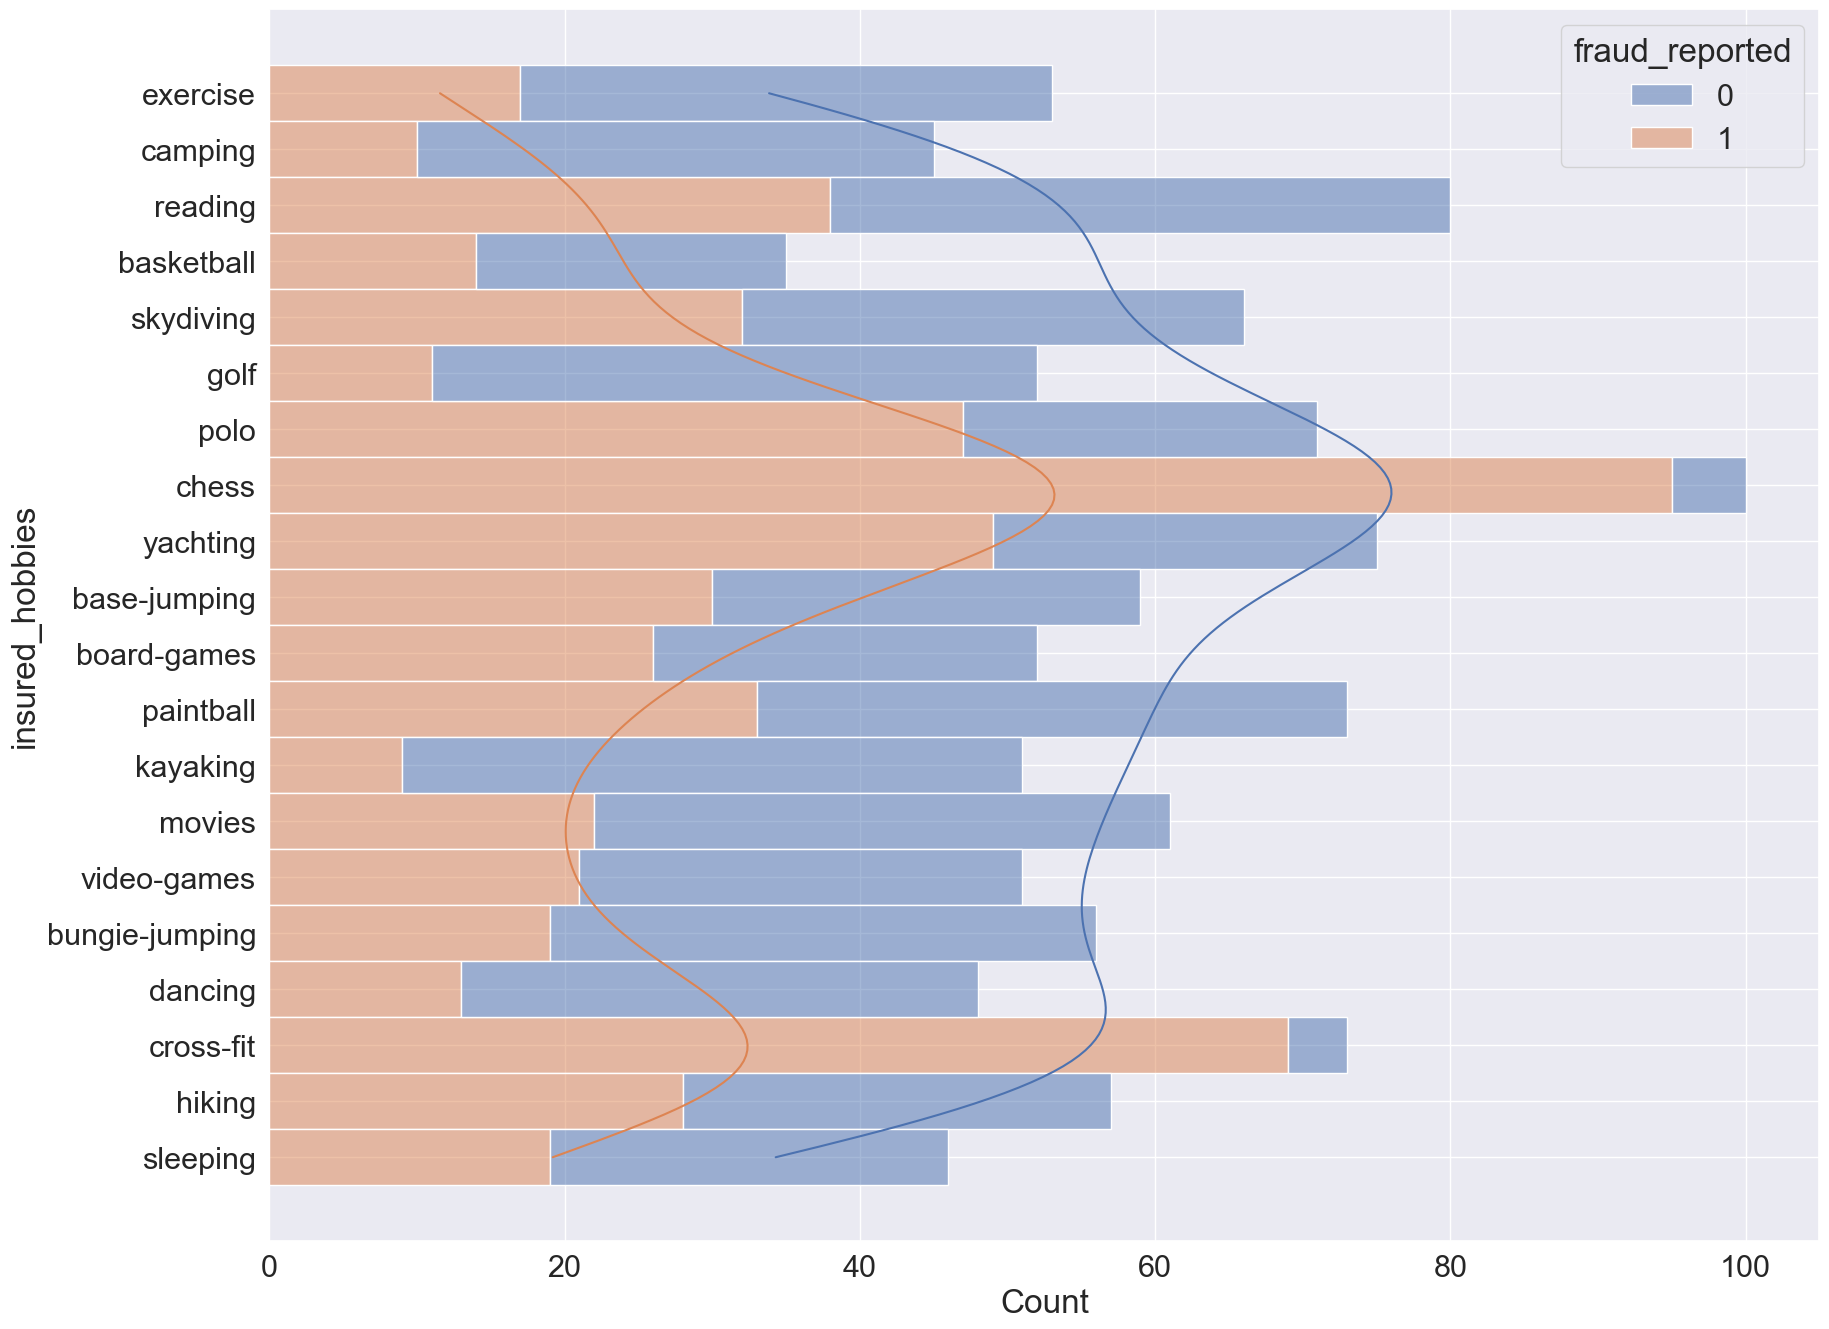

In [63]:

fig, ax = plt.subplots(figsize=(20,16))
sns.histplot(data = train_set_over, y = 'insured_hobbies', hue='fraud_reported', 
             multiple='stack', kde='true', bins=10)
plt.show()

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try kdeplot.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2211: UserWarning: `displot` is a figure-

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

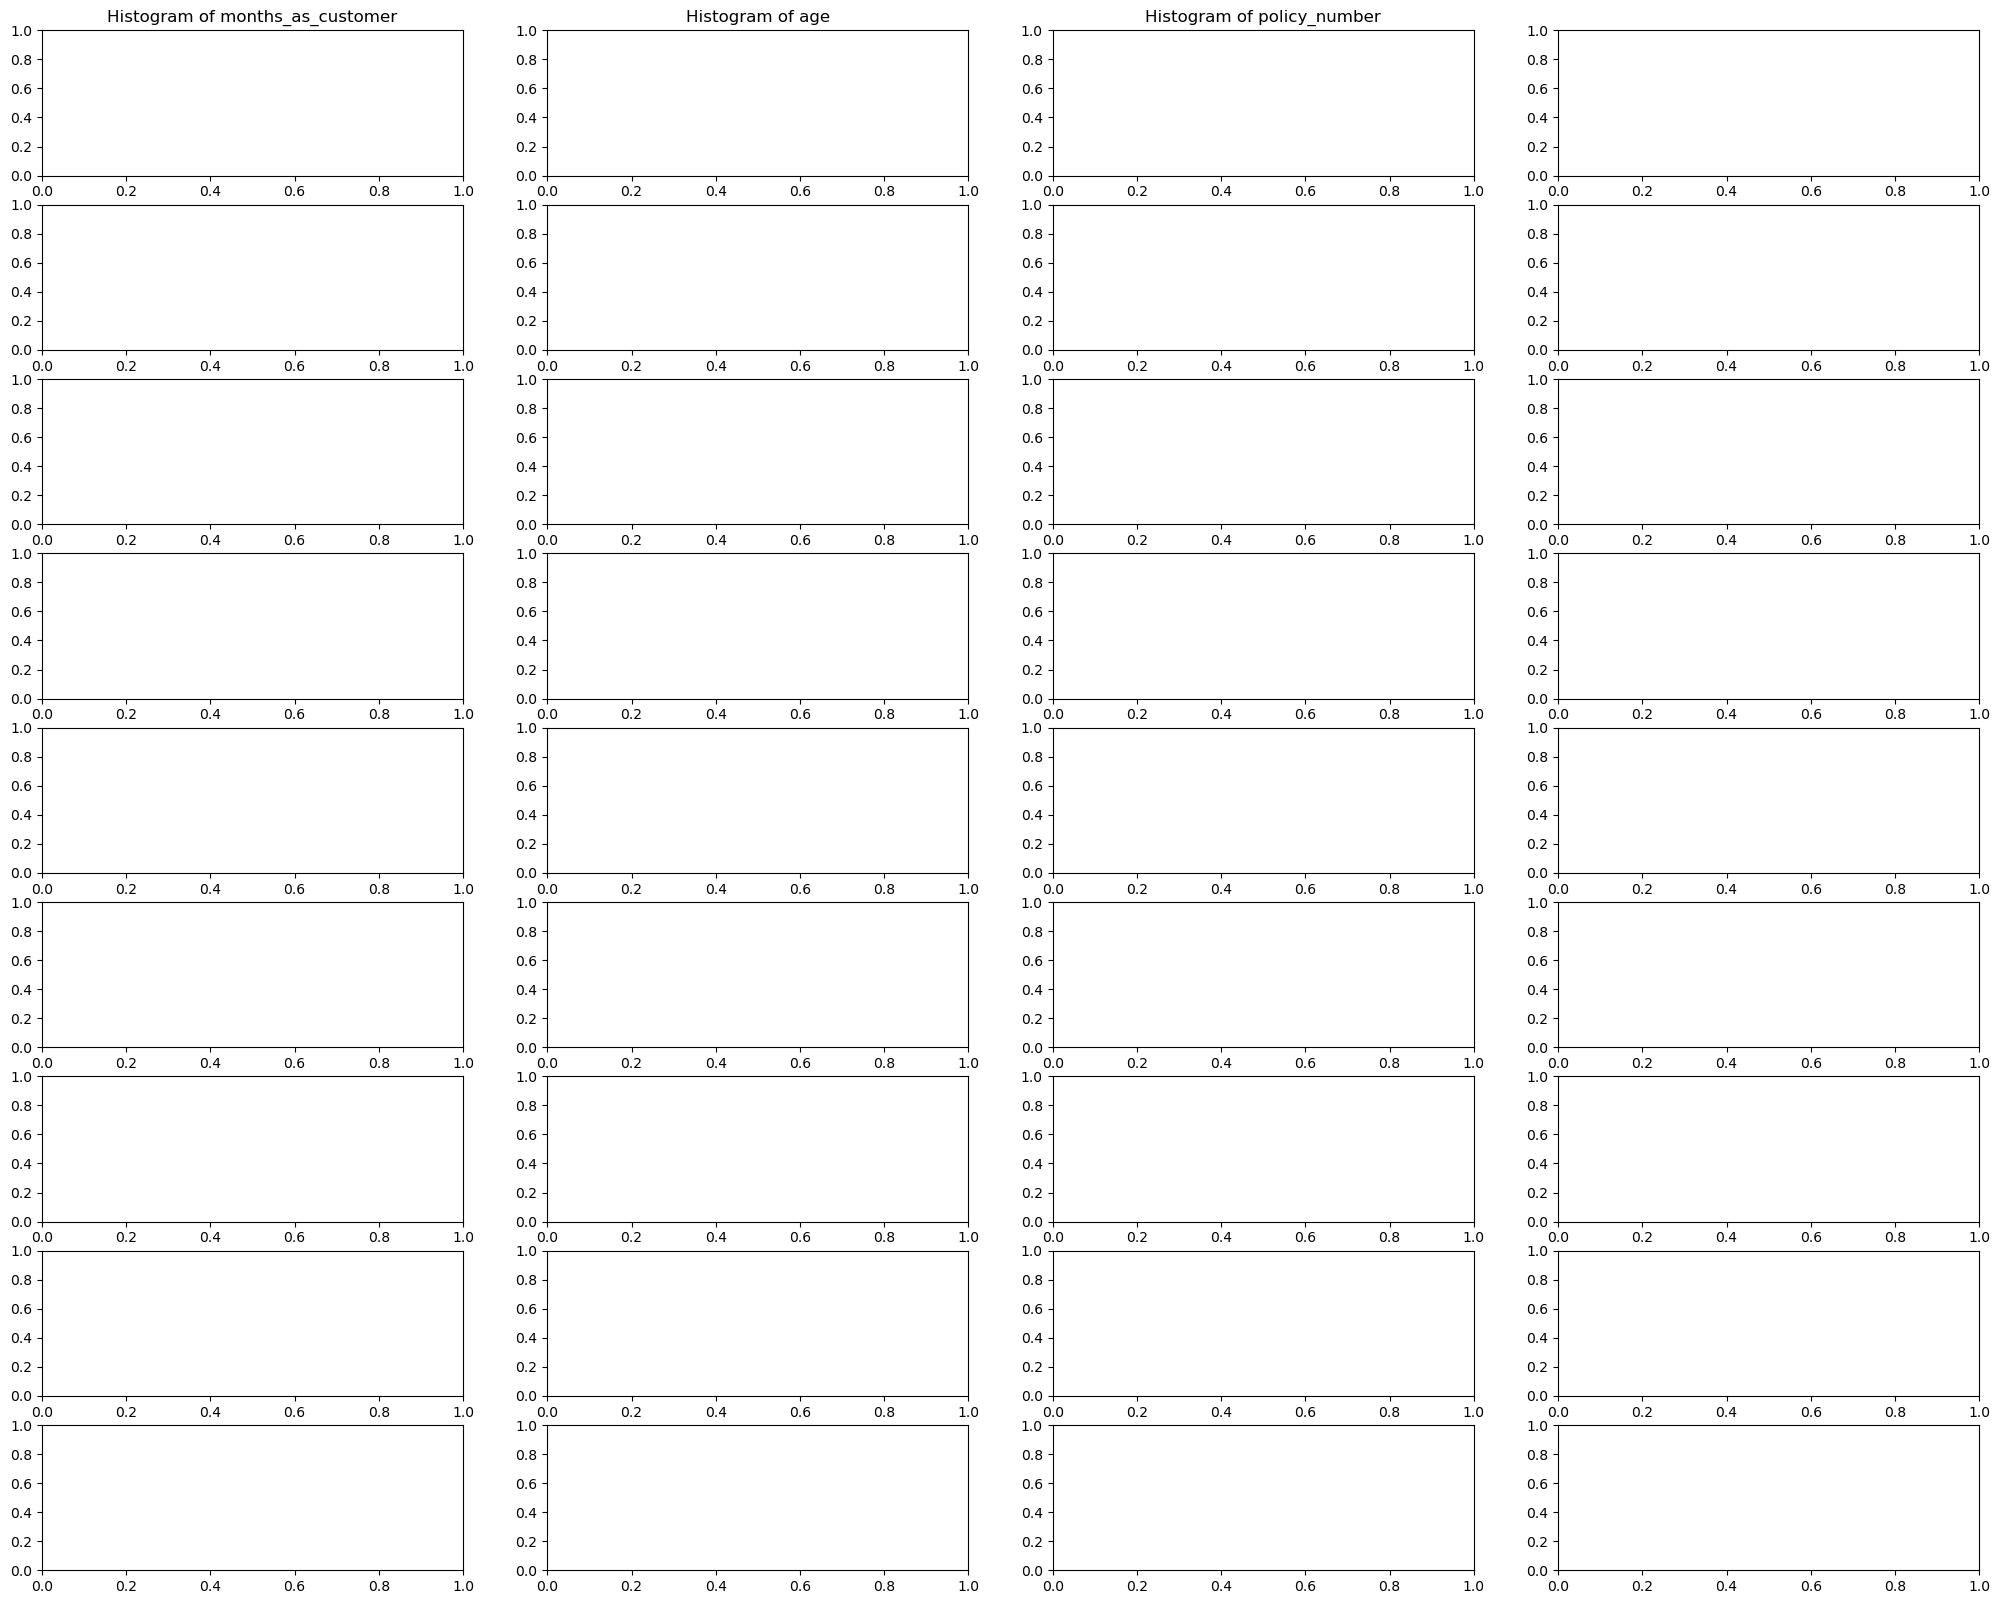

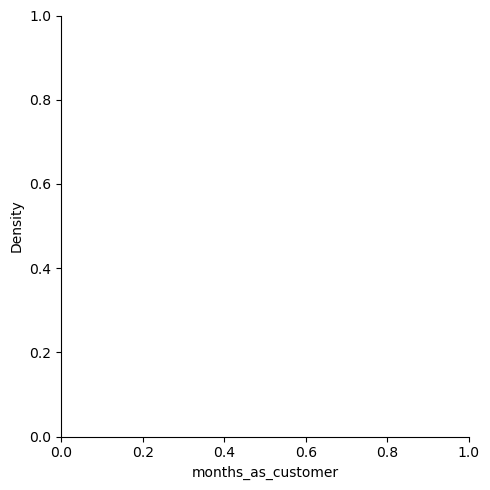

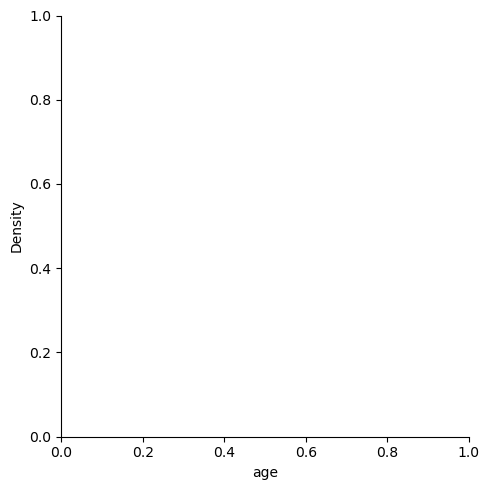

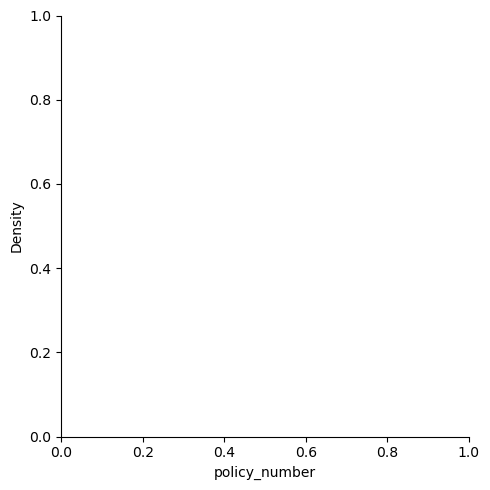

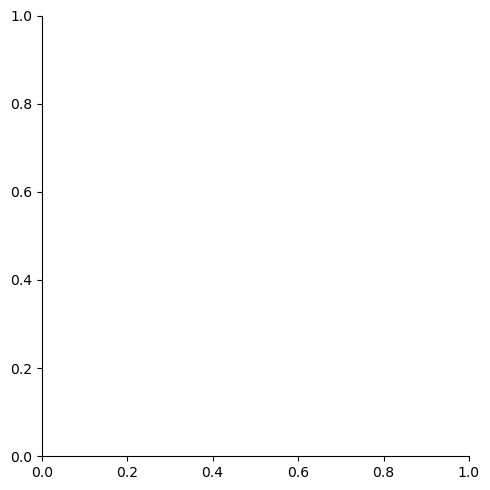

In [74]:
fig, axes = plt.subplots(nrows=9, ncols=4, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = train_set_over.columns.to_list()  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    data = train_set_over
    sns.histplot(data = data, x = col, hue='fraud_reported', multiple='stack', kde='true', bins=10, ax=ax)
    ax.set(title='Histogram of {}'.format(col))
    
fig.tight_layout()
plt.show()

## 2.2 Heatmap Correlation

### 2.2.1 Change Label to 0 and 1

In [66]:
train_set_smote[config_data['label']] = train_set_smote[config_data['label']].map(dict(Y=1, N=0))
train_set_over[config_data['label']] = train_set_over[config_data['label']].map(dict(Y=1, N=0))

<AxesSubplot:>

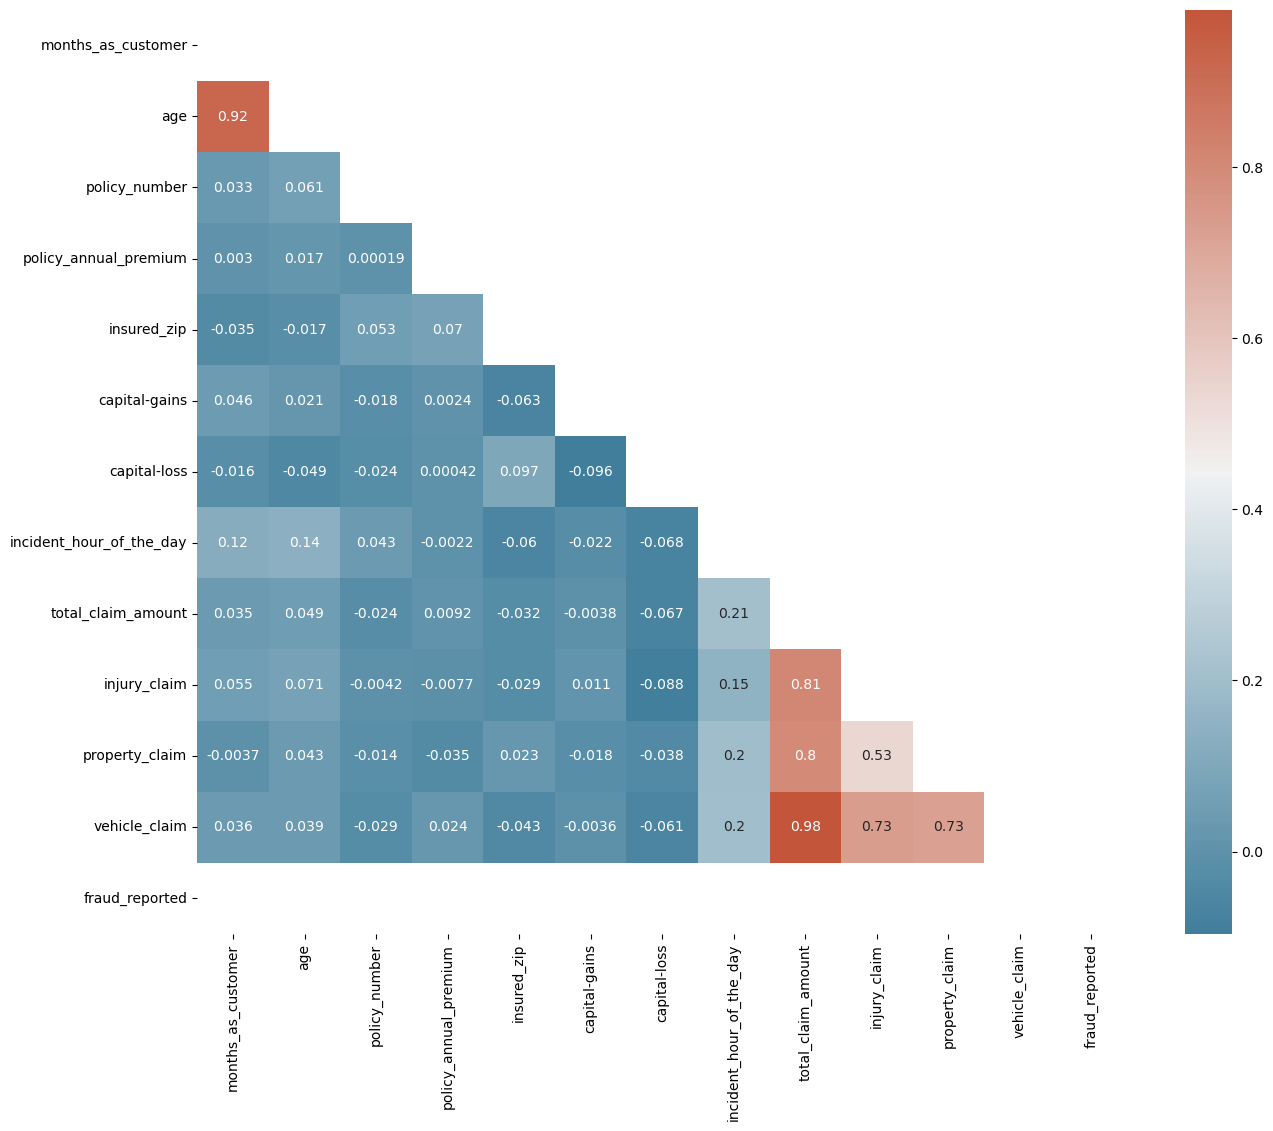

In [67]:
# heatmap correlation matrix
corr = train_set_smote.corr()

fig, ax = plt.subplots(figsize=(15, 12))
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, annot=True, cmap=cmap, mask=mask)

In [68]:
corr

months_as_customer       age  policy_number  \
months_as_customer                  1.000000  0.921332       0.033204   
age                                 0.921332  1.000000       0.061497   
policy_number                       0.033204  0.061497       1.000000   
policy_annual_premium               0.003044  0.016837       0.000192   
insured_zip                        -0.035047 -0.017254       0.052729   
capital-gains                       0.045510  0.021316      -0.018077   
capital-loss                       -0.016196 -0.048860      -0.024475   
incident_hour_of_the_day            0.122800  0.137376       0.042974   
total_claim_amount                  0.035231  0.048667      -0.023927   
injury_claim                        0.055428  0.071014      -0.004182   
property_claim                     -0.003699  0.042573      -0.013500   
vehicle_claim                       0.035814  0.038591      -0.028993   
fraud_reported                           NaN       NaN            NaN   

                          policy_annual_premium  insured_zip  capital-gains  \
months_as_customer                     0.003044    -0.035047       0.045510   
age                                    0.016837    -0.017254       0.021316   
policy_number                          0.000192     0.052729      -0.018077   
policy_annual_premium                  1.000000     0.070118       0.002369   
insured_zip                            0.070118     1.000000      -0.063176   
capital-gains                          0.002369    -0.063176       1.000000   
capital-loss                           0.000417     0.096571      -0.095883   
incident_hour_of_the_day              -0.002215    -0.060167      -0.021583   
total_claim_amount                     0.009199    -0.031719      -0.003831   
injury_claim                          -0.007723    -0.028979       0.010841   
property_claim                        -0.034941     0.023278      -0.017731   
vehicle_claim                          0.023997    -0.042923      -0.003644   
fraud_reported                              NaN          NaN            NaN   

                          capital-loss  incident_hour_of_the_day  \
months_as_customer           -0.016196                  0.122800   
age                          -0.048860                  0.137376   
policy_number                -0.024475                  0.042974   
policy_annual_premium         0.000417                 -0.002215   
insured_zip                   0.096571                 -0.060167   
capital-gains                -0.095883                 -0.021583   
capital-loss                  1.000000                 -0.068132   
incident_hour_of_the_day     -0.068132                  1.000000   
total_claim_amount           -0.067041                  0.206480   
injury_claim                 -0.088483                  0.148714   
property_claim               -0.038258                  0.196579   
vehicle_claim                -0.060900                  0.199796   
fraud_reported                     NaN                       NaN   

                          total_claim_amount  injury_claim  property_claim  \
months_as_customer                  0.035231      0.055428       -0.003699   
age                                 0.048667      0.071014        0.042573   
policy_number                      -0.023927     -0.004182       -0.013500   
policy_annual_premium               0.009199     -0.007723       -0.034941   
insured_zip                        -0.031719     -0.028979        0.023278   
capital-gains                      -0.003831      0.010841       -0.017731   
capital-loss                       -0.067041     -0.088483       -0.038258   
incident_hour_of_the_day            0.206480      0.148714        0.196579   
total_claim_amount                  1.000000      0.807598        0.801824   
injury_claim                        0.807598      1.000000        0.534961   
property_claim                      0.801824      0.534961        1.000000   
vehicle

In [85]:
train_set_smote.corr()

months_as_customer       age  policy_number  \
months_as_customer                  1.000000  0.921332       0.033204   
age                                 0.921332  1.000000       0.061497   
policy_number                       0.033204  0.061497       1.000000   
policy_annual_premium               0.003044  0.016837       0.000192   
insured_zip                        -0.035047 -0.017254       0.052729   
capital-gains                       0.045510  0.021316      -0.018077   
capital-loss                       -0.016196 -0.048860      -0.024475   
incident_hour_of_the_day            0.122800  0.137376       0.042974   
total_claim_amount                  0.035231  0.048667      -0.023927   
injury_claim                        0.055428  0.071014      -0.004182   
property_claim                     -0.003699  0.042573      -0.013500   
vehicle_claim                       0.035814  0.038591      -0.028993   

                          policy_annual_premium  insured_zip  capital-gains  \
months_as_customer                     0.003044    -0.035047       0.045510   
age                                    0.016837    -0.017254       0.021316   
policy_number                          0.000192     0.052729      -0.018077   
policy_annual_premium                  1.000000     0.070118       0.002369   
insured_zip                            0.070118     1.000000      -0.063176   
capital-gains                          0.002369    -0.063176       1.000000   
capital-loss                           0.000417     0.096571      -0.095883   
incident_hour_of_the_day              -0.002215    -0.060167      -0.021583   
total_claim_amount                     0.009199    -0.031719      -0.003831   
injury_claim                          -0.007723    -0.028979       0.010841   
property_claim                        -0.034941     0.023278      -0.017731   
vehicle_claim                          0.023997    -0.042923      -0.003644   

                          capital-loss  incident_hour_of_the_day  \
months_as_customer           -0.016196                  0.122800   
age                          -0.048860                  0.137376   
policy_number                -0.024475                  0.042974   
policy_annual_premium         0.000417                 -0.002215   
insured_zip                   0.096571                 -0.060167   
capital-gains                -0.095883                 -0.021583   
capital-loss                  1.000000                 -0.068132   
incident_hour_of_the_day     -0.068132                  1.000000   
total_claim_amount           -0.067041                  0.206480   
injury_claim                 -0.088483                  0.148714   
property_claim               -0.038258                  0.196579   
vehicle_claim                -0.060900                  0.199796   

                          total_claim_amount  injury_claim  property_claim  \
months_as_customer                  0.035231      0.055428       -0.003699   
age                                 0.048667      0.071014        0.042573   
policy_number                      -0.023927     -0.004182       -0.013500   
policy_annual_premium               0.009199     -0.007723       -0.034941   
insured_zip                        -0.031719     -0.028979        0.023278   
capital-gains                      -0.003831      0.010841       -0.017731   
capital-loss                       -0.067041     -0.088483       -0.038258   
incident_hour_of_the_day            0.206480      0.148714        0.196579   
total_claim_amount                  1.000000      0.807598        0.801824   
injury_claim                        0.807598      1.000000        0.534961   
property_claim                      0.801824      0.534961        1.000000   
vehicle_claim                       0.983503      0.731794        0.725802   

                          vehicle_claim  
months_as_customer             0.035814  
age                            0.038591  
policy_number         

## 2.3 Histogram Plot

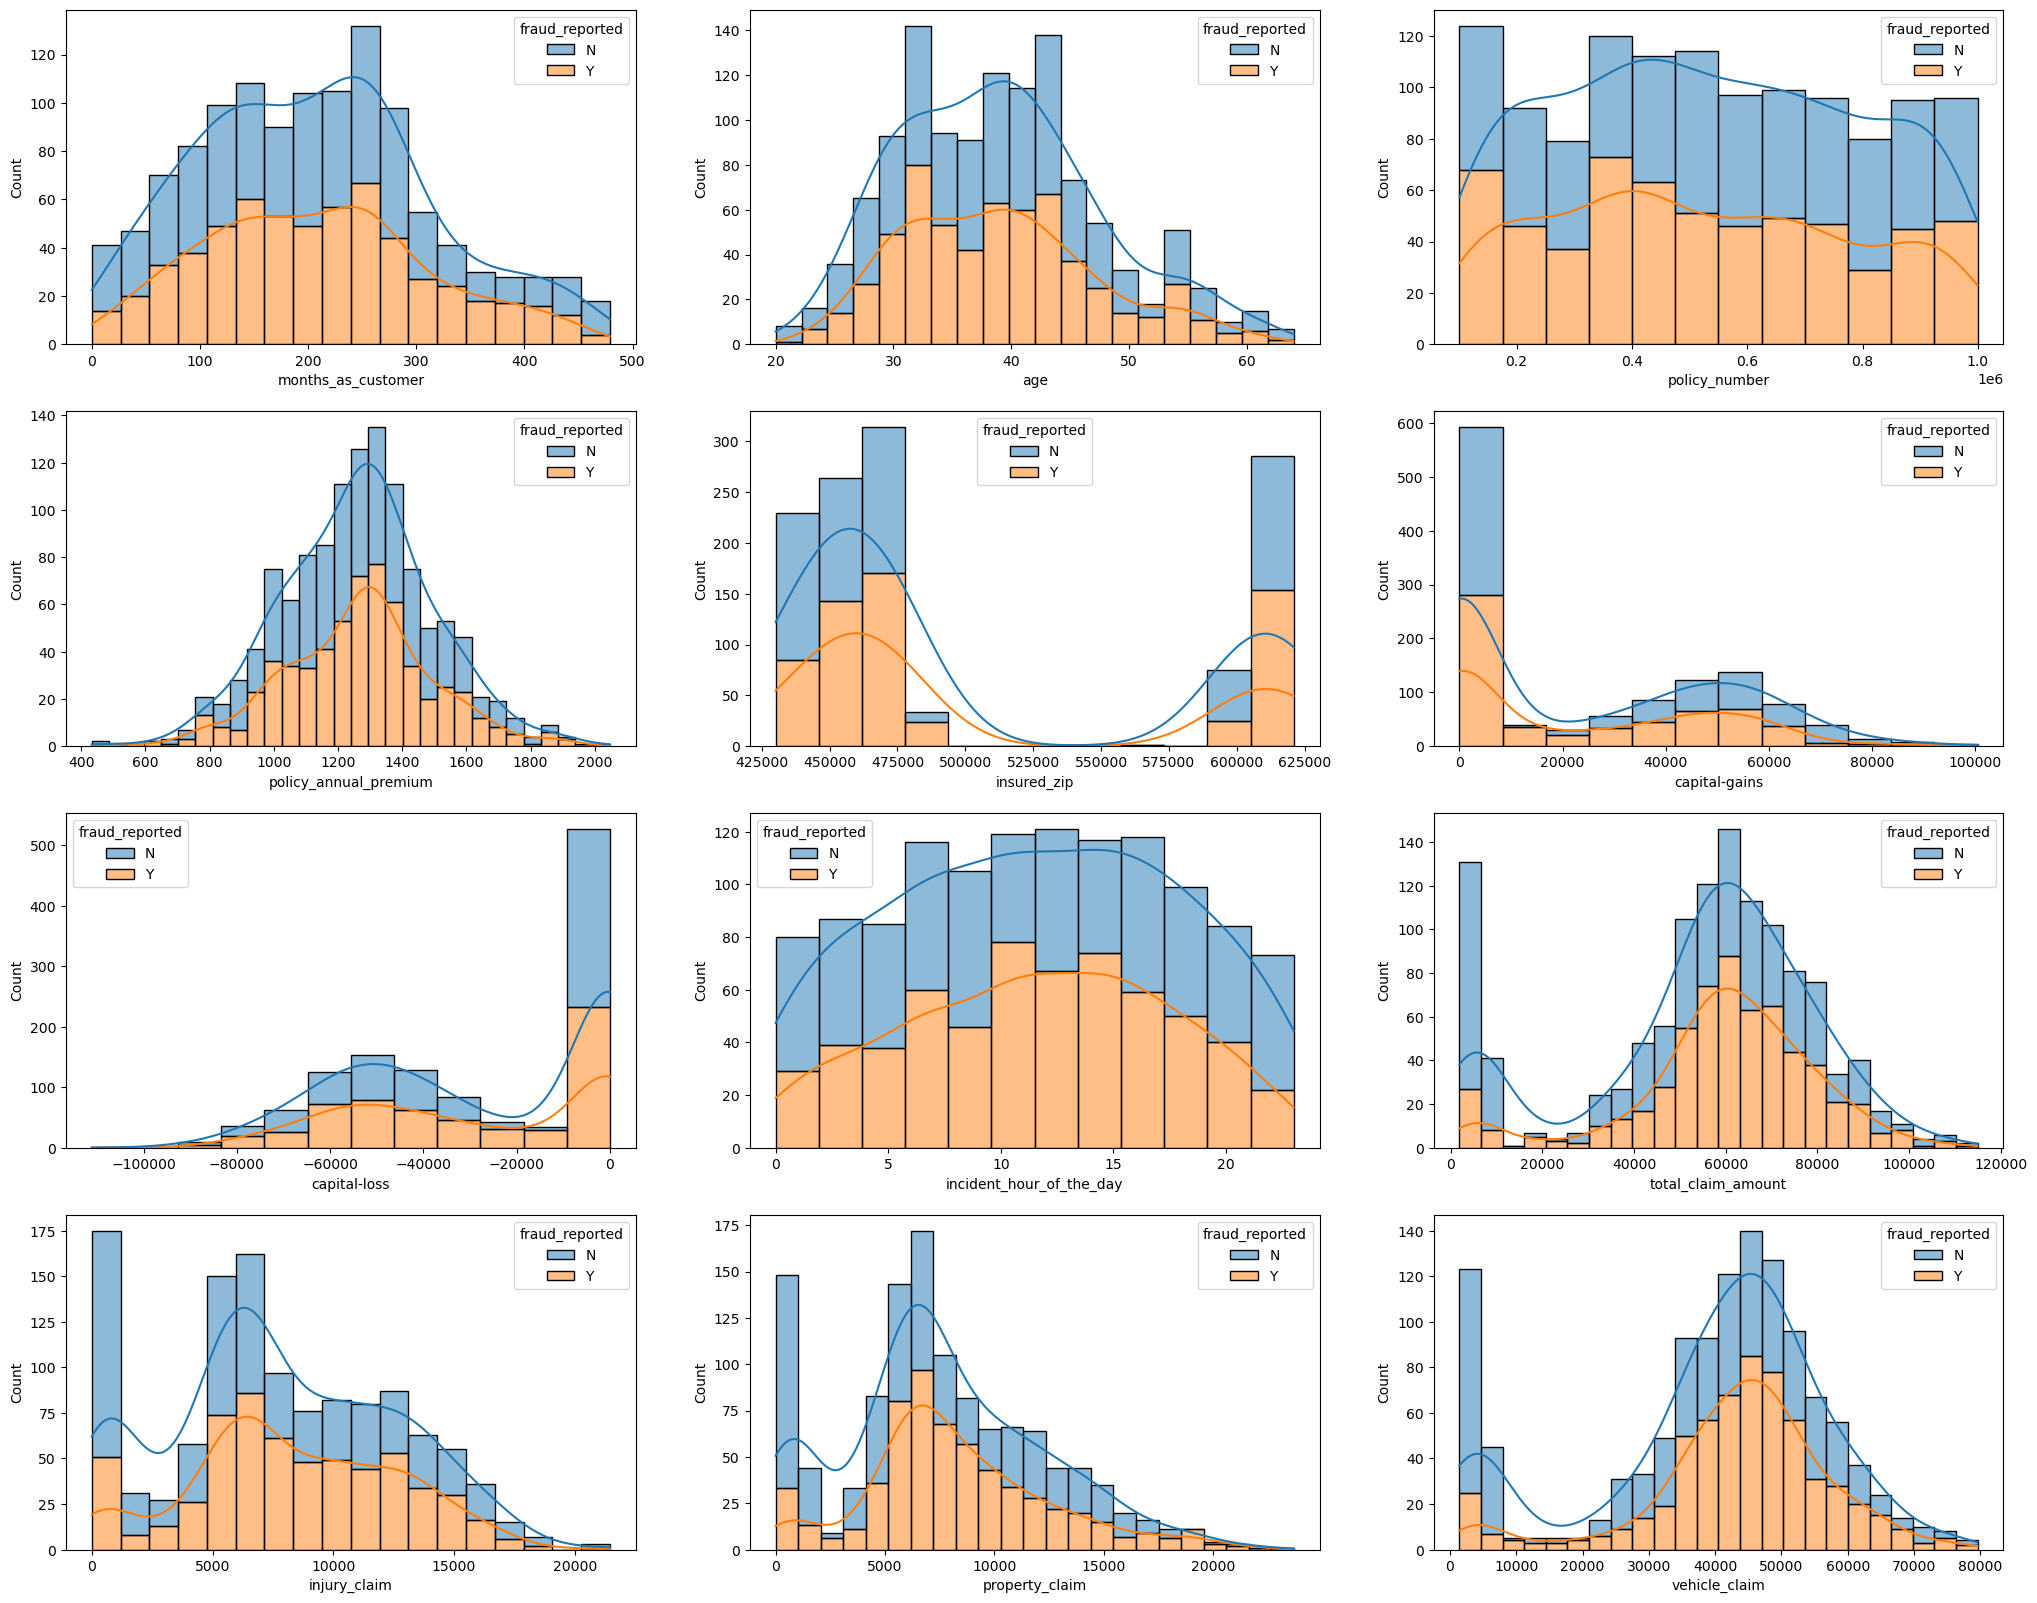

In [22]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = config_data['int32_col']  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    sns.histplot(data=train_set_smote, x=col, hue=config_data['label'], multiple='stack', kde=True, ax=ax)
    
# for col in config_data['int32_col']:
#     sns.kdeplot(data=train_set_smote, x=col, hue=config_data['label'])

plt.show()

## 2.4 Kernel Density Estimation PLOT

In [ ]:
sns.kdeplot(data=train_set_smote, x=col, hue=config_data['label'])

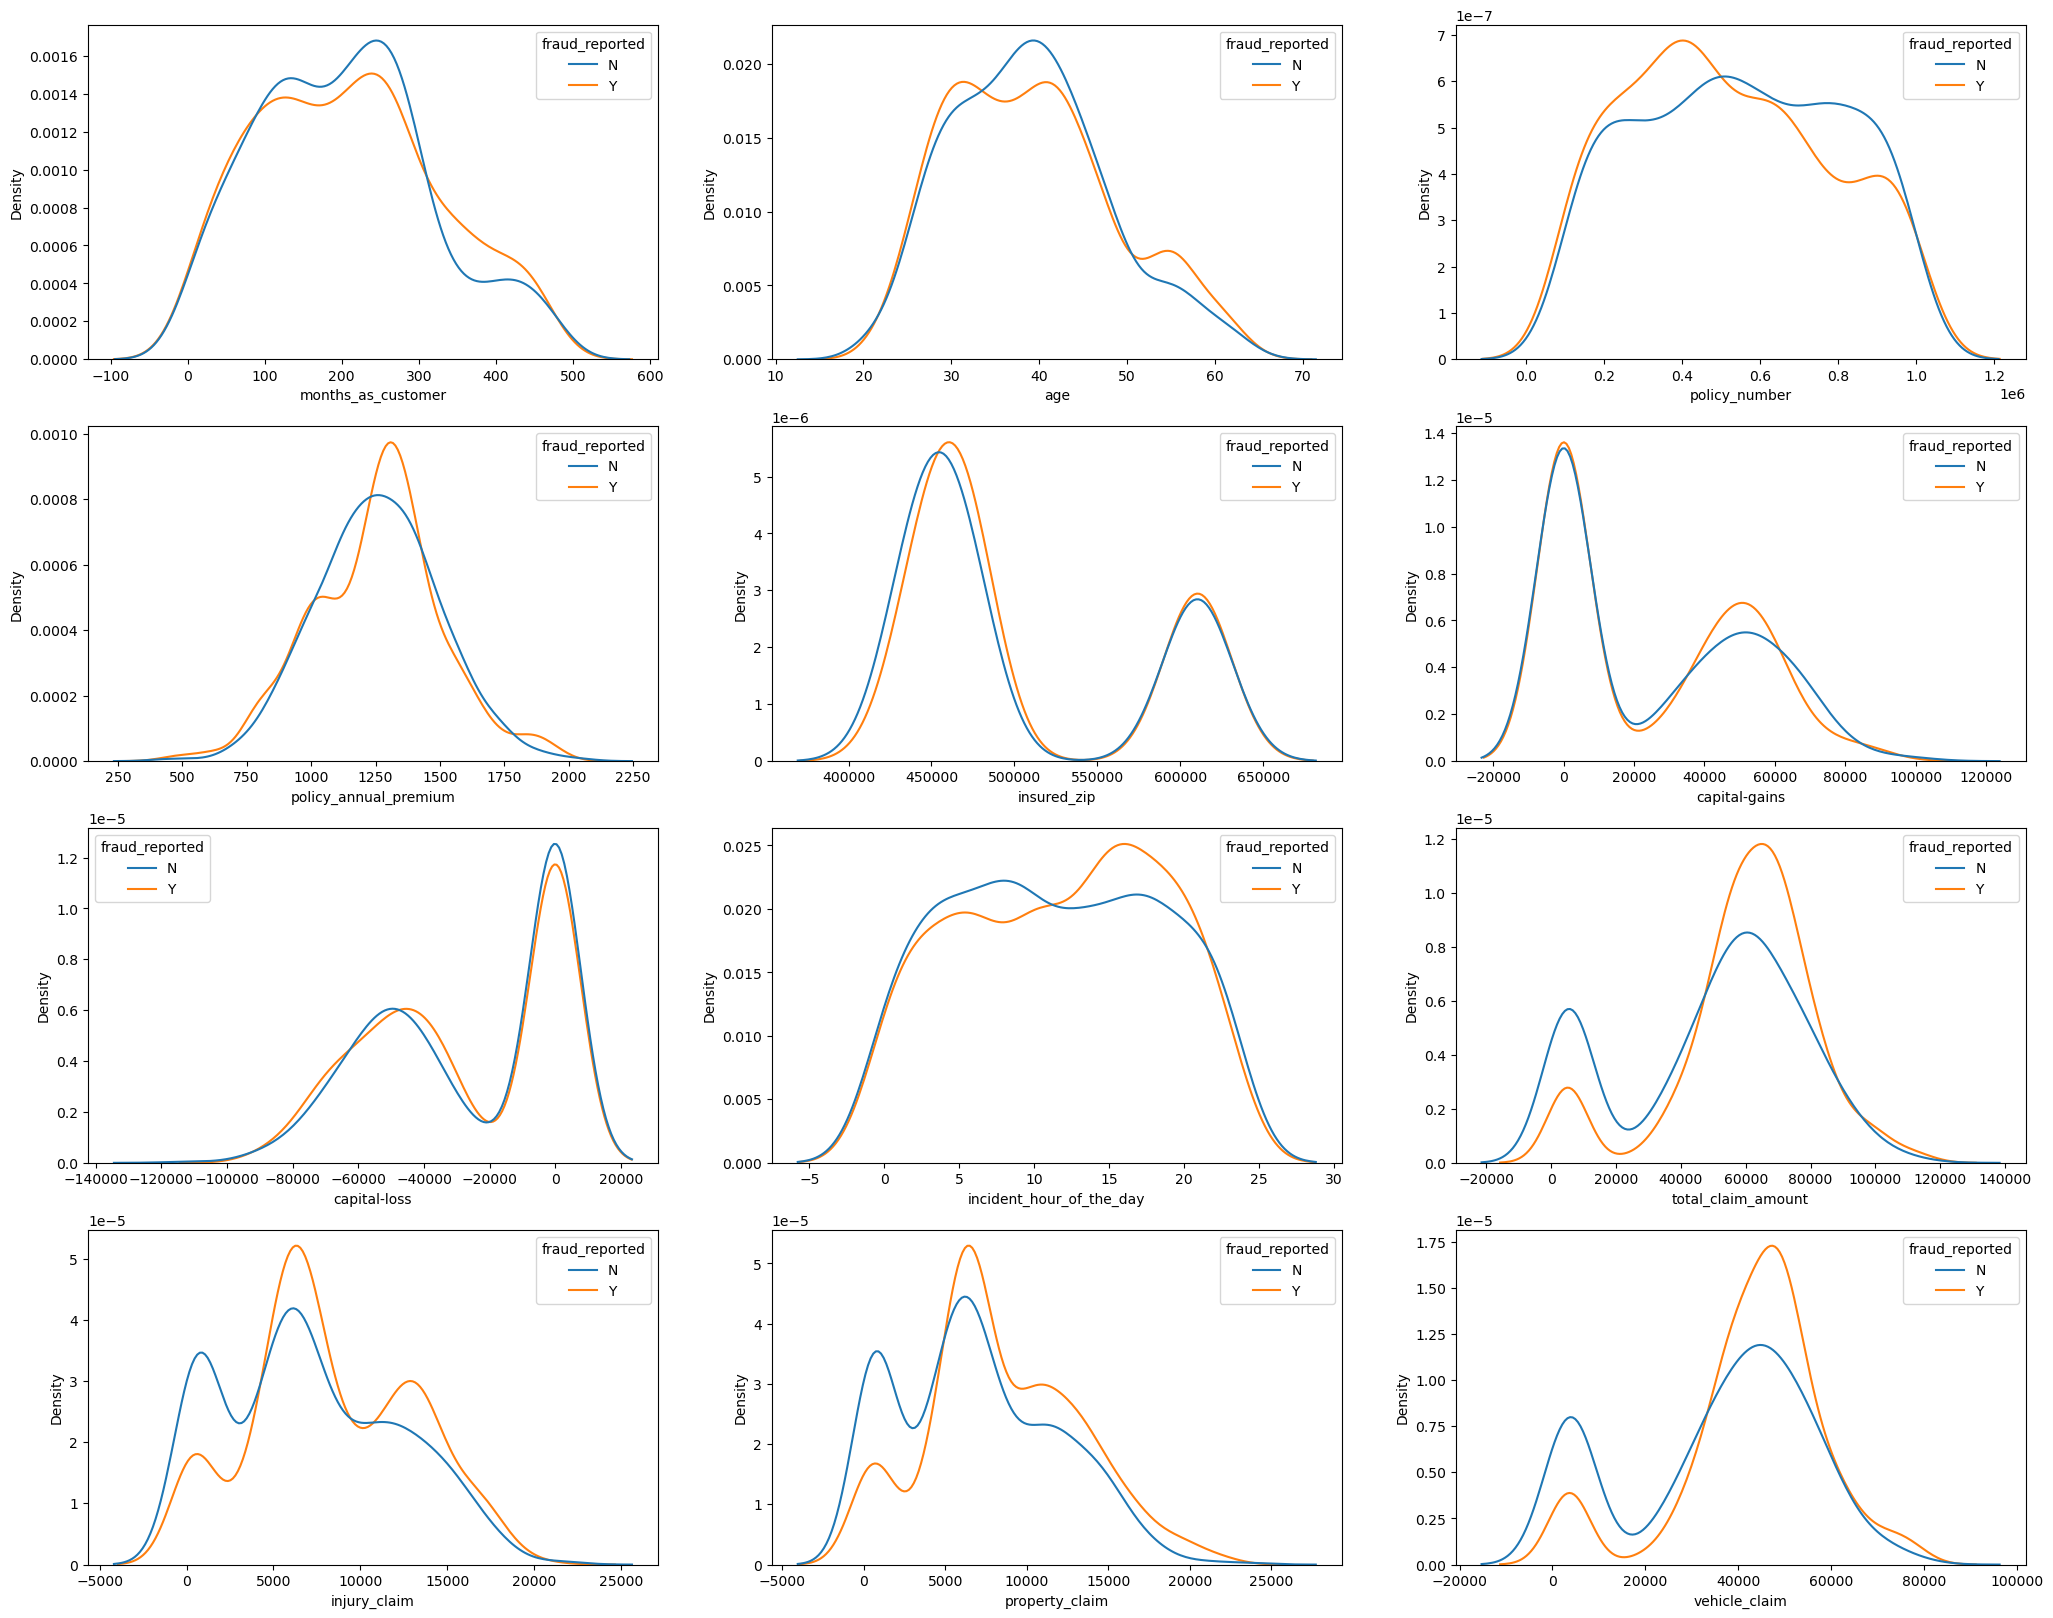

In [92]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = config_data['int32_col']  # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    sns.kdeplot(data=train_set_over, x=col, hue=config_data['label'], ax=ax)

plt.show()

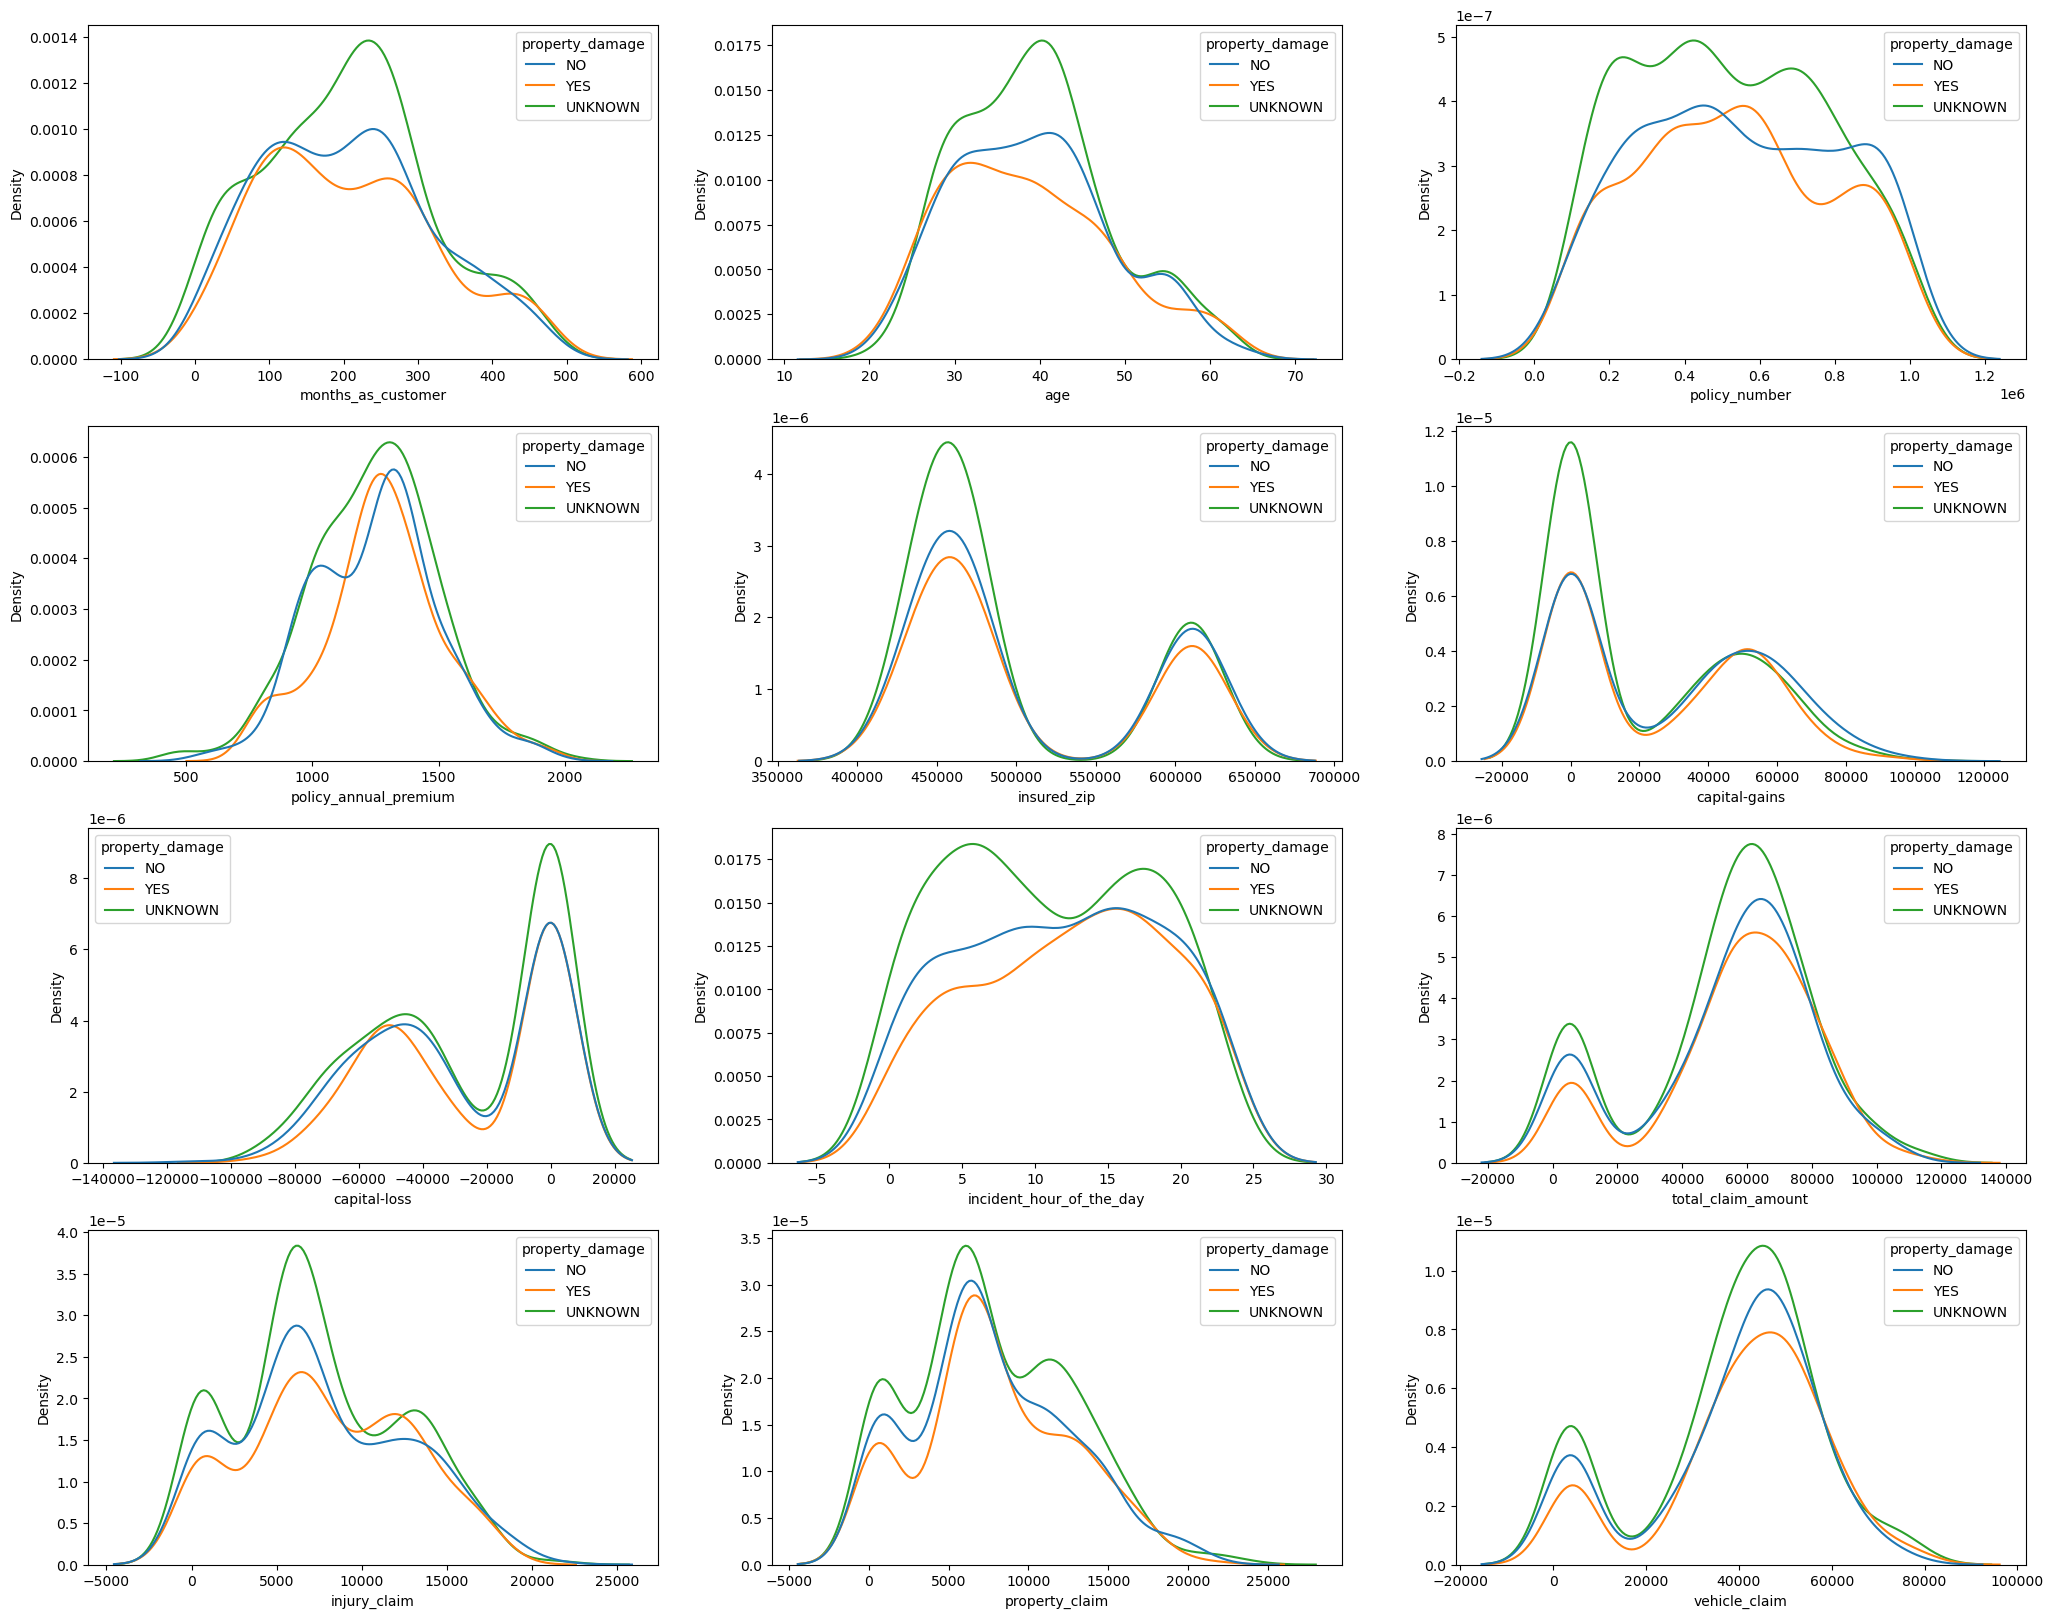

In [52]:
# train_set_inszip_550 = train_set_over[train_set_over['injury_claim']>=5000]
# train_set_inszip_450 = train_set_over[train_set_over['injury_claim']<5000]

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25, 20), sharex=False, sharey=False)
axes = axes.ravel()  # array to 1D
cols = config_data['int32_col'] # create a list of dataframe columns to use

for col, ax in zip(cols, axes):
    sns.kdeplot(data=train_set_over, x=col, hue='property_damage', ax=ax)

plt.show()

## 2.5 BoxPlot of Categorical Data

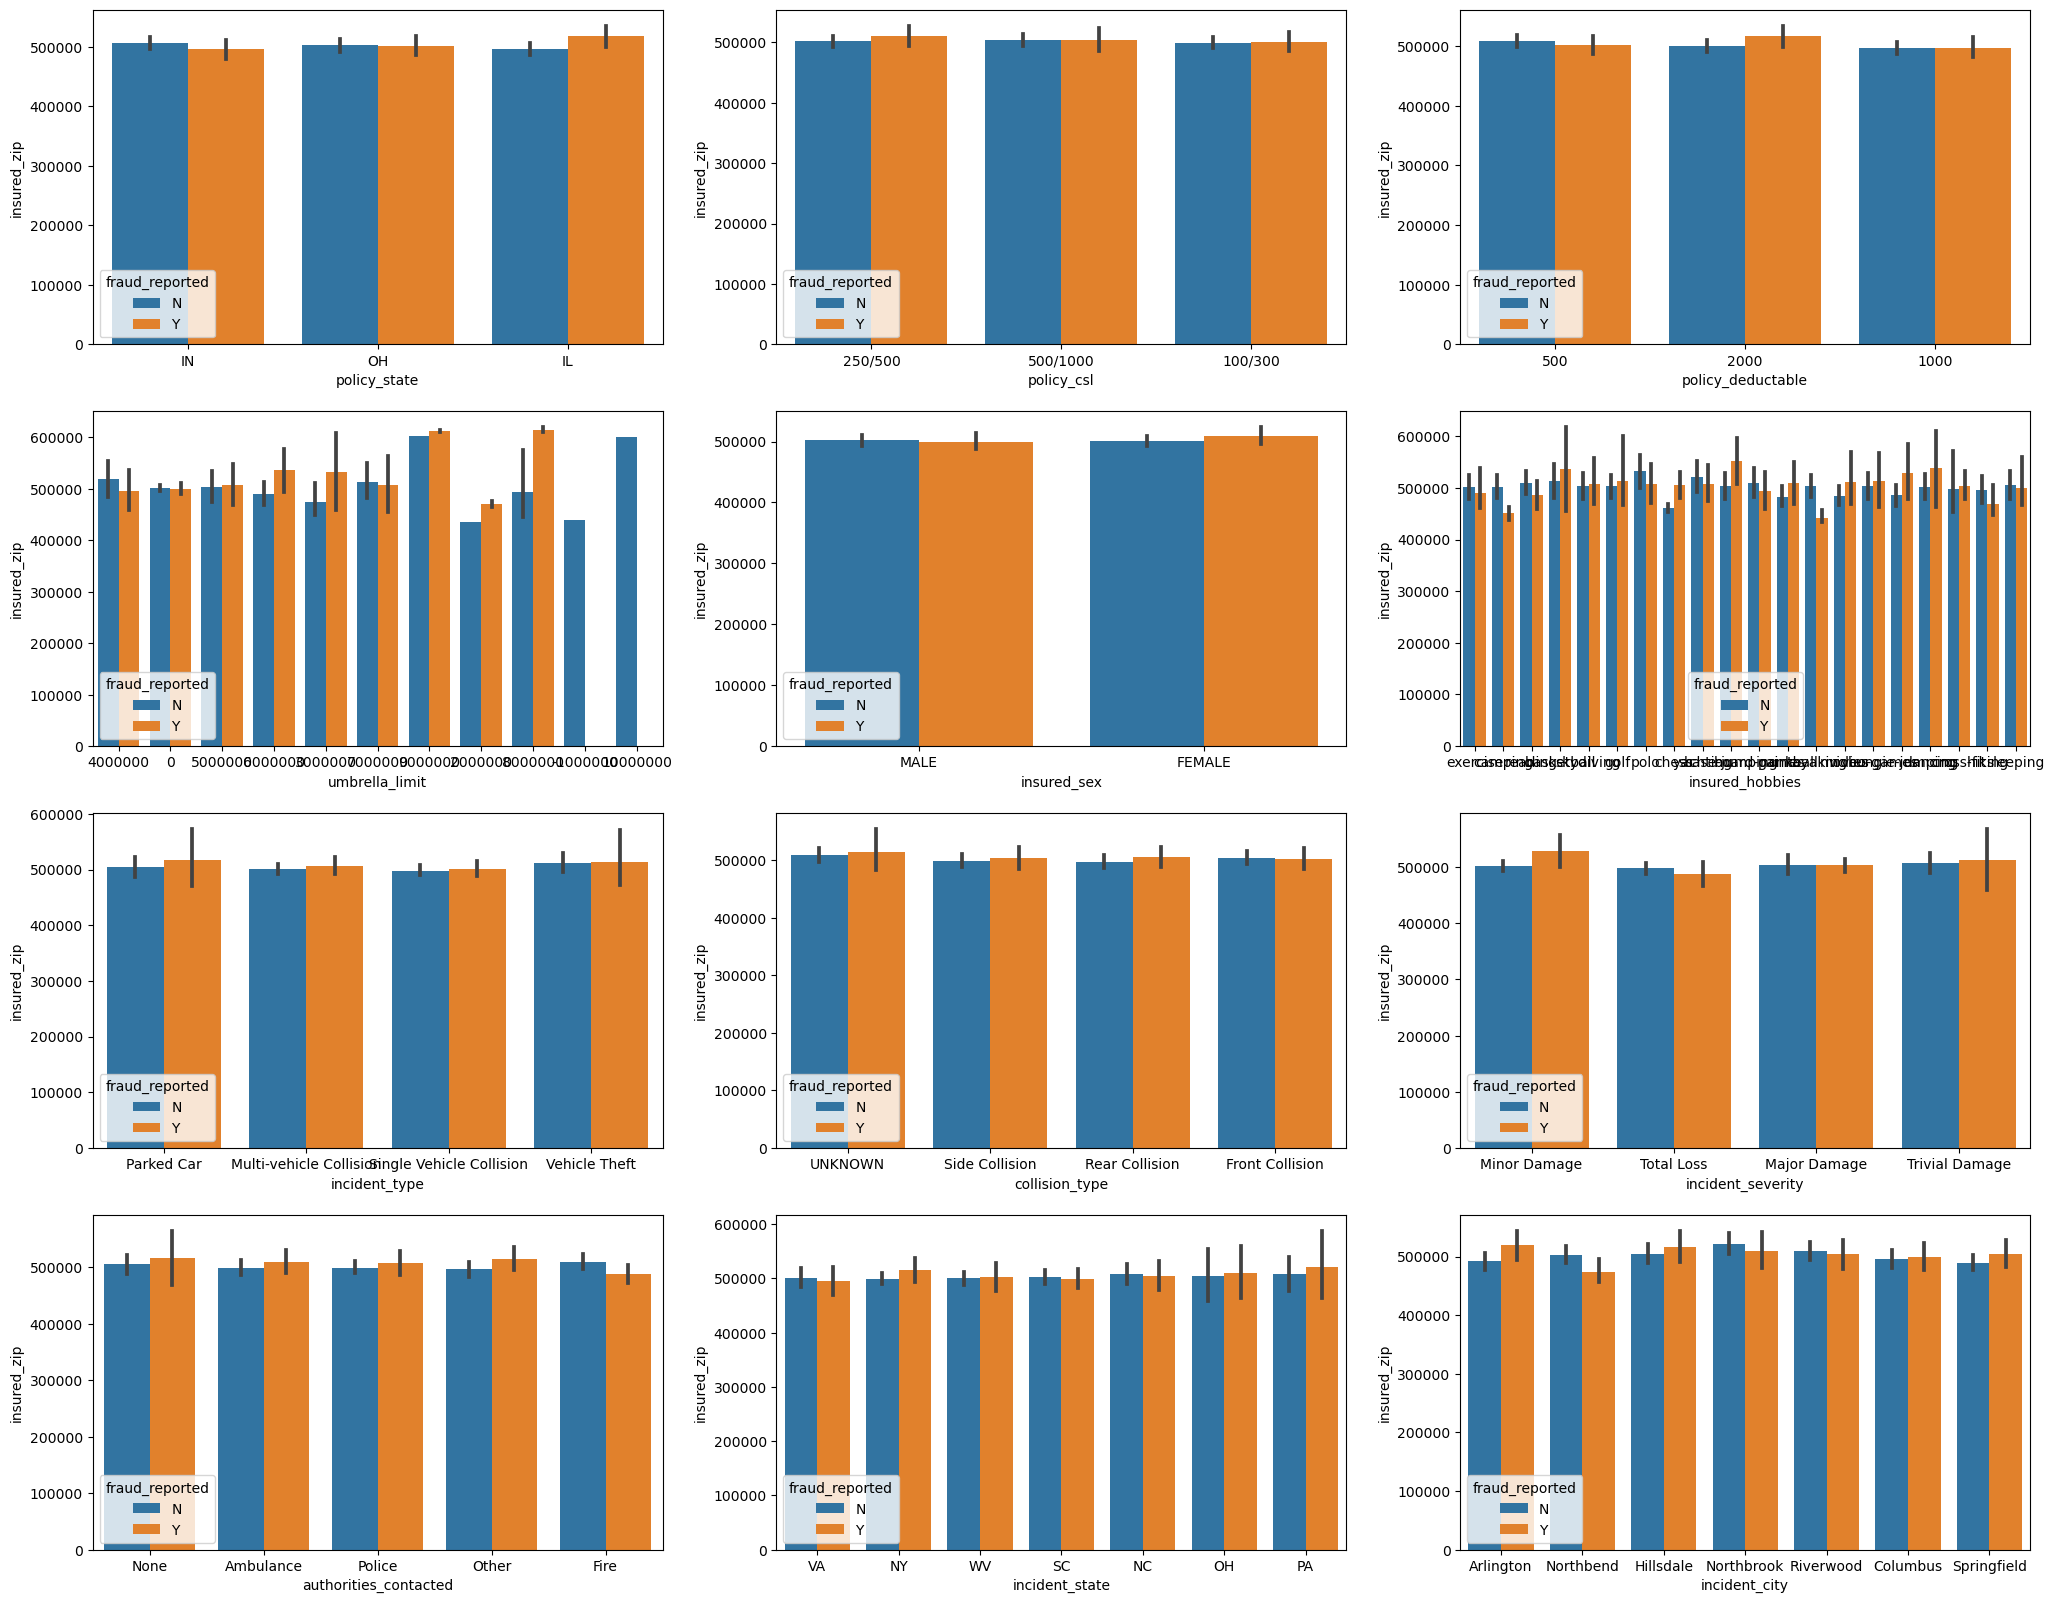

In [95]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(25,20), sharex=False, sharey=False)
axes = axes.ravel()
cols = config_data['object_columns']

for col, ax in zip(cols,axes):
    sns.barplot(data=train_set, x=col, y='insured_zip', hue=config_data['label'], ax=ax)
    
plt.show()

In [94]:
train_set['fraud_reported'].value_counts(normalize=True)

N    0.7525
Y    0.2475
Name: fraud_reported, dtype: float64

## 2.6 Check Map Correlations using PPS

In [23]:
import ppscore as pps

In [29]:
pps.score(train_set_smote, "incident_severity", "fraud_reported")
# pps.score()

{'x': 'incident_severity',
 'y': 'fraud_reported',
 'ppscore': 0.4455147667499889,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.5,
 'model_score': 0.27724261662500554,
 'model': DecisionTreeRegressor()}

In [30]:
pps.matrix(train_set_smote)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\ASUS\anaconda3\lib\site-pa

x                        y   ppscore            case  \
0     months_as_customer       months_as_customer  1.000000  predict_itself   
1     months_as_customer                      age  0.612088      regression   
2     months_as_customer            policy_number  0.000000      regression   
3     months_as_customer    policy_annual_premium  0.000000      regression   
4     months_as_customer              insured_zip  0.000000      regression   
...                  ...                      ...       ...             ...   
1084      fraud_reported          property_damage  0.000000  classification   
1085      fraud_reported  police_report_available  0.000000  classification   
1086      fraud_reported                auto_make  0.000000  classification   
1087      fraud_reported               auto_model  0.000000  classification   
1088      fraud_reported           fraud_reported  1.000000  predict_itself   

      is_valid_score               metric  baseline_score    model_score  \
0               True                 None        0.000000       1.000000   
1               True  mean absolute error        6.916113       2.682845   
2               True  mean absolute error   221980.145349  270249.666866   
3               True  mean absolute error      181.717608     230.893528   
4               True  mean absolute error    52917.815615   67705.991105   
...              ...                  ...             ...            ...   
1084            True          weighted F1        0.356312       0.340428   
1085            True          weighted F1        0.333056       0.179687   
1086            True          weighted F1        0.058970       0.030550   
1087            True          weighted F1        0.034053       0.006566   
1088            True                 None        0.000000       1.000000   

                         model  
0                         None  
1      DecisionTreeRegressor()  
2      DecisionTreeRegressor()  
3      DecisionTreeRegressor()  
4      DecisionTreeRegressor()  
...                        ...  
1084  DecisionTreeClassifier()  
1085  DecisionTreeClassifier()  
1086  DecisionTreeClassifier()  
1087  DecisionTreeClassifier()  
1088                      None  

[1089 rows x 9 columns]

## 2.7 Checking Outliers data

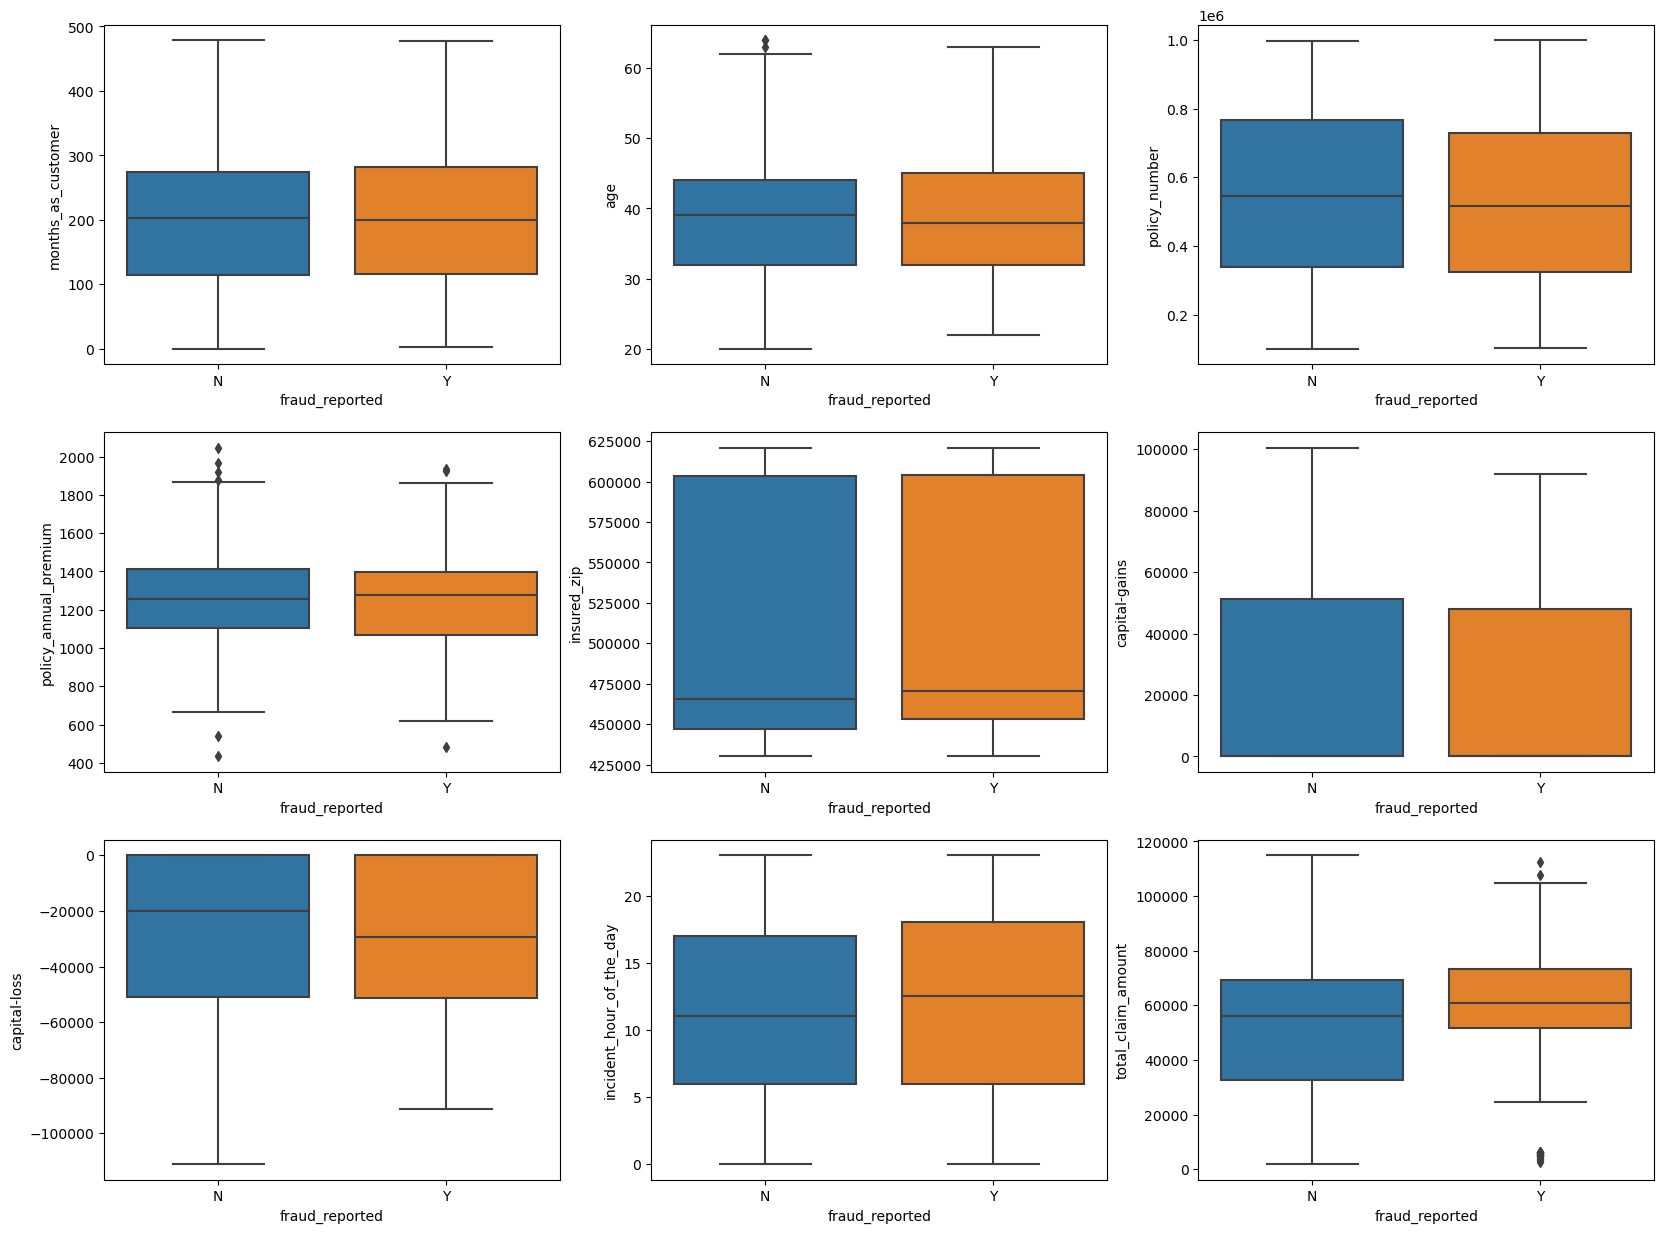

In [104]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(20,15), sharex=False, sharey=False)
axes = axes.ravel()
cols = config_data['int32_col']

for col, ax in zip(cols,axes):
    sns.boxplot(data=train_set, y=col, x='fraud_reported', ax=ax)
    
# for col in config_data['int32_col']:
#     sns.boxplot(data=train_set_smote, x=col)

plt.show()

Umbrella limit has many outliers, we can take down the umbrella limit column

## 2.8 Handling Outliers data

#### 2.8.1 Outlier Policy_annual_premium

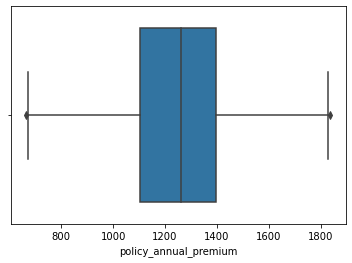

In [129]:
q1 = train_set_smote['policy_annual_premium'].quantile(0.25)
q3 = train_set_smote['policy_annual_premium'].quantile(0.75)
iqr = q3-q1

train_set_smote_annual = train_set_smote[~((train_set_smote['policy_annual_premium'] < (q1 - 1.5*iqr)) |
                                        (train_set_smote['policy_annual_premium'] > (q3 + 1.5*iqr)))].copy()

sns.boxplot(data=train_set_smote_annual, x='policy_annual_premium')
plt.show()

### 2.5.2 Outliers total_claim_amount

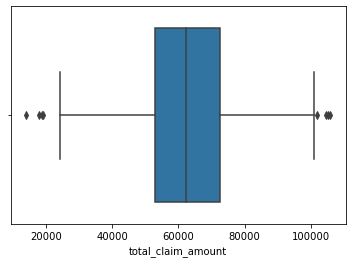

In [130]:
q1 = train_set_smote['total_claim_amount'].quantile(0.25)
q3 = train_set_smote['total_claim_amount'].quantile(0.75)
iqr = q3-q1

train_set_smote_claim = train_set_smote[~((train_set_smote['total_claim_amount'] < (q1 - 1.5*iqr)) |
                                        (train_set_smote['total_claim_amount'] > (q3 + 1.5*iqr)))].copy()

sns.boxplot(data=train_set_smote_claim, x='total_claim_amount')
plt.show()

### 2.5.3 Outliers injury_claim

<AxesSubplot:xlabel='injury_claim'>

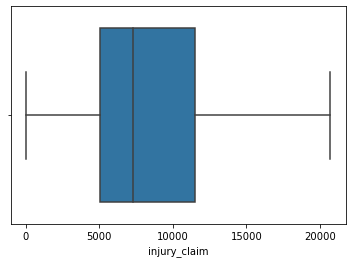

In [131]:
q1 = train_set_smote['injury_claim'].quantile(0.25)
q3 = train_set_smote['injury_claim'].quantile(0.75)
iqr = q3-q1

train_set_smote_injury = train_set_smote[~((train_set_smote['injury_claim'] < (q1 - 1.5*iqr)) |
                                        (train_set_smote['injury_claim'] > (q3 + 1.5*iqr)))].copy()

sns.boxplot(data=train_set_smote_injury, x='injury_claim')

### 2.5.4 Outliers property claim

<AxesSubplot:xlabel='property_claim'>

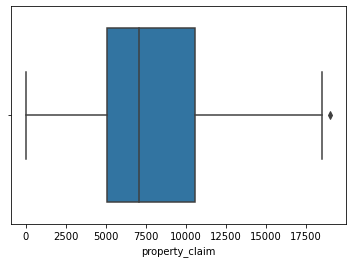

In [132]:
q1 = train_set_smote['property_claim'].quantile(0.25)
q3 = train_set_smote['property_claim'].quantile(0.75)
iqr = q3-q1

train_set_smote_property = train_set_smote[~((train_set_smote['property_claim'] < (q1 - 1.5*iqr)) |
                                        (train_set_smote['property_claim'] > (q3 + 1.5*iqr)))].copy()

sns.boxplot(data=train_set_smote_property, x='property_claim')

### 2.5.5 Outliers vehicle claim

<AxesSubplot:xlabel='vehicle_claim'>

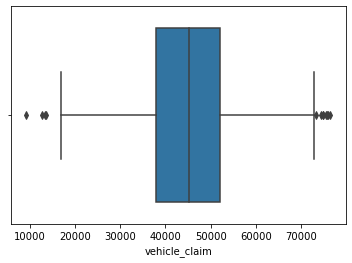

In [133]:
q1 = train_set_smote['vehicle_claim'].quantile(0.25)
q3 = train_set_smote['vehicle_claim'].quantile(0.75)
iqr = q3-q1

train_set_smote_vehicle = train_set_smote[~((train_set_smote['vehicle_claim'] < (q1 - 1.5*iqr)) |
                                        (train_set_smote['vehicle_claim'] > (q3 + 1.5*iqr)))].copy()

sns.boxplot(data=train_set_smote_vehicle, x='vehicle_claim')

## 2.9 Cleaned Data

In [134]:
train_set_smote_cleaned = pd.concat(
    [
        train_set_smote_annual,
        train_set_smote_claim,
        train_set_smote_injury,
        train_set_smote_property,
        train_set_smote_vehicle
    ]
)

In [135]:
count_dupilcate_index = train_set_smote_cleaned.index.value_counts()

In [136]:
used_index_data = count_dupilcate_index[count_dupilcate_index == 5].index

In [137]:
train_set_smote_cleaned = train_set_smote_cleaned.loc[used_index_data].drop_duplicates()

In [138]:
train_set_smote_cleaned

months_as_customer  age  policy_number  policy_annual_premium  \
0                   428   54         492745                   1506   
714                 113   28         717616                   1122   
701                 124   29         379241                   1209   
702                 187   37         283747                    996   
703                  45   26         752487                   1270   
..                  ...  ...            ...                    ...   
401                 465   63         531160                   1006   
377                 215   38         833321                   1405   
30                   77   26         357394                    785   
400                 111   27         514065                   1363   
380                 192   35         582011                   1245   

     insured_zip  capital-gains  capital-loss  incident_hour_of_the_day  \
0         453407              0        -24400                        16   
714       432086              0             0                        13   
701       447215          64694        -44335                        16   
702       450971              0        -43706                        21   
703       464924              0        -44188                        13   
..           ...            ...           ...                       ...   
401       458936              0             0                         7   
377       465376              0             0                        10   
30        620207          49700             0                        12   
400       604377          51100             0                        12   
380       435481              0        -40300                        19   

     total_claim_amount  injury_claim  ...   collision_type  \
0                 76560         12760  ...   Side Collision   
714               88456         12491  ...   Side Collision   
701               73166         16228  ...   Rear Collision   
702               67312          8414  ...  Front Collision   
703               53720          8981  ...   Side Collision   
..                  ...           ...  ...              ...   
401               43560          4840  ...   Side Collision   
377               70700          7070  ...   Rear Collision   
30                69080         12560  ...   Rear Collision   
400               90970         16540  ...   Side Collision   
380               76600         15320  ...   Rear Collision   

     incident_severity authorities_contacted incident_state incident_city  \
0         Minor Damage                  Fire             NY     Riverwood   
714       Major Damage                  Fire             SC     Northbend   
701         Total Loss                  Fire             SC     Northbend   
702       Major Damage                 Other             NY     Northbend   
703       Major Damage                  Fire             VA     Northbend   
..                 ...                   ...            ...           ...   
401       Minor Damage                 Other             WV      Columbus   
377         Total Loss                Police             SC     Arlington   
30        Major Damage                Police             NY     Hillsdale   
400         Total Loss                Police             VA   Springfield   
380         Total Loss                 Other             WV   Springfield   

    property_damage police_report_available   auto_make auto_model  \
0                NO                       ?      Nissan     Ultima   
714               ?                     YES   Chevrolet  Silverado   
701             YES                       ?   Chevrolet         93   
702               ?                      NO      Toyota    Corolla   
703               ?                      NO   Chevrolet  Silverado   
..              ...                     ...         ...        ...   
401              NO                       ?      Suburu     Legacy   
377               ?  

## 2.10 Pairplot

In [109]:
sns.pairplot(
    train_set[
        train_set[config_data['object_predictor']]
    ].sample(200),
    hue = config_data['label']
)

ValueError: Boolean array expected for the condition, not object

In [29]:
config_data['int32_col'].append('fraud_reported')

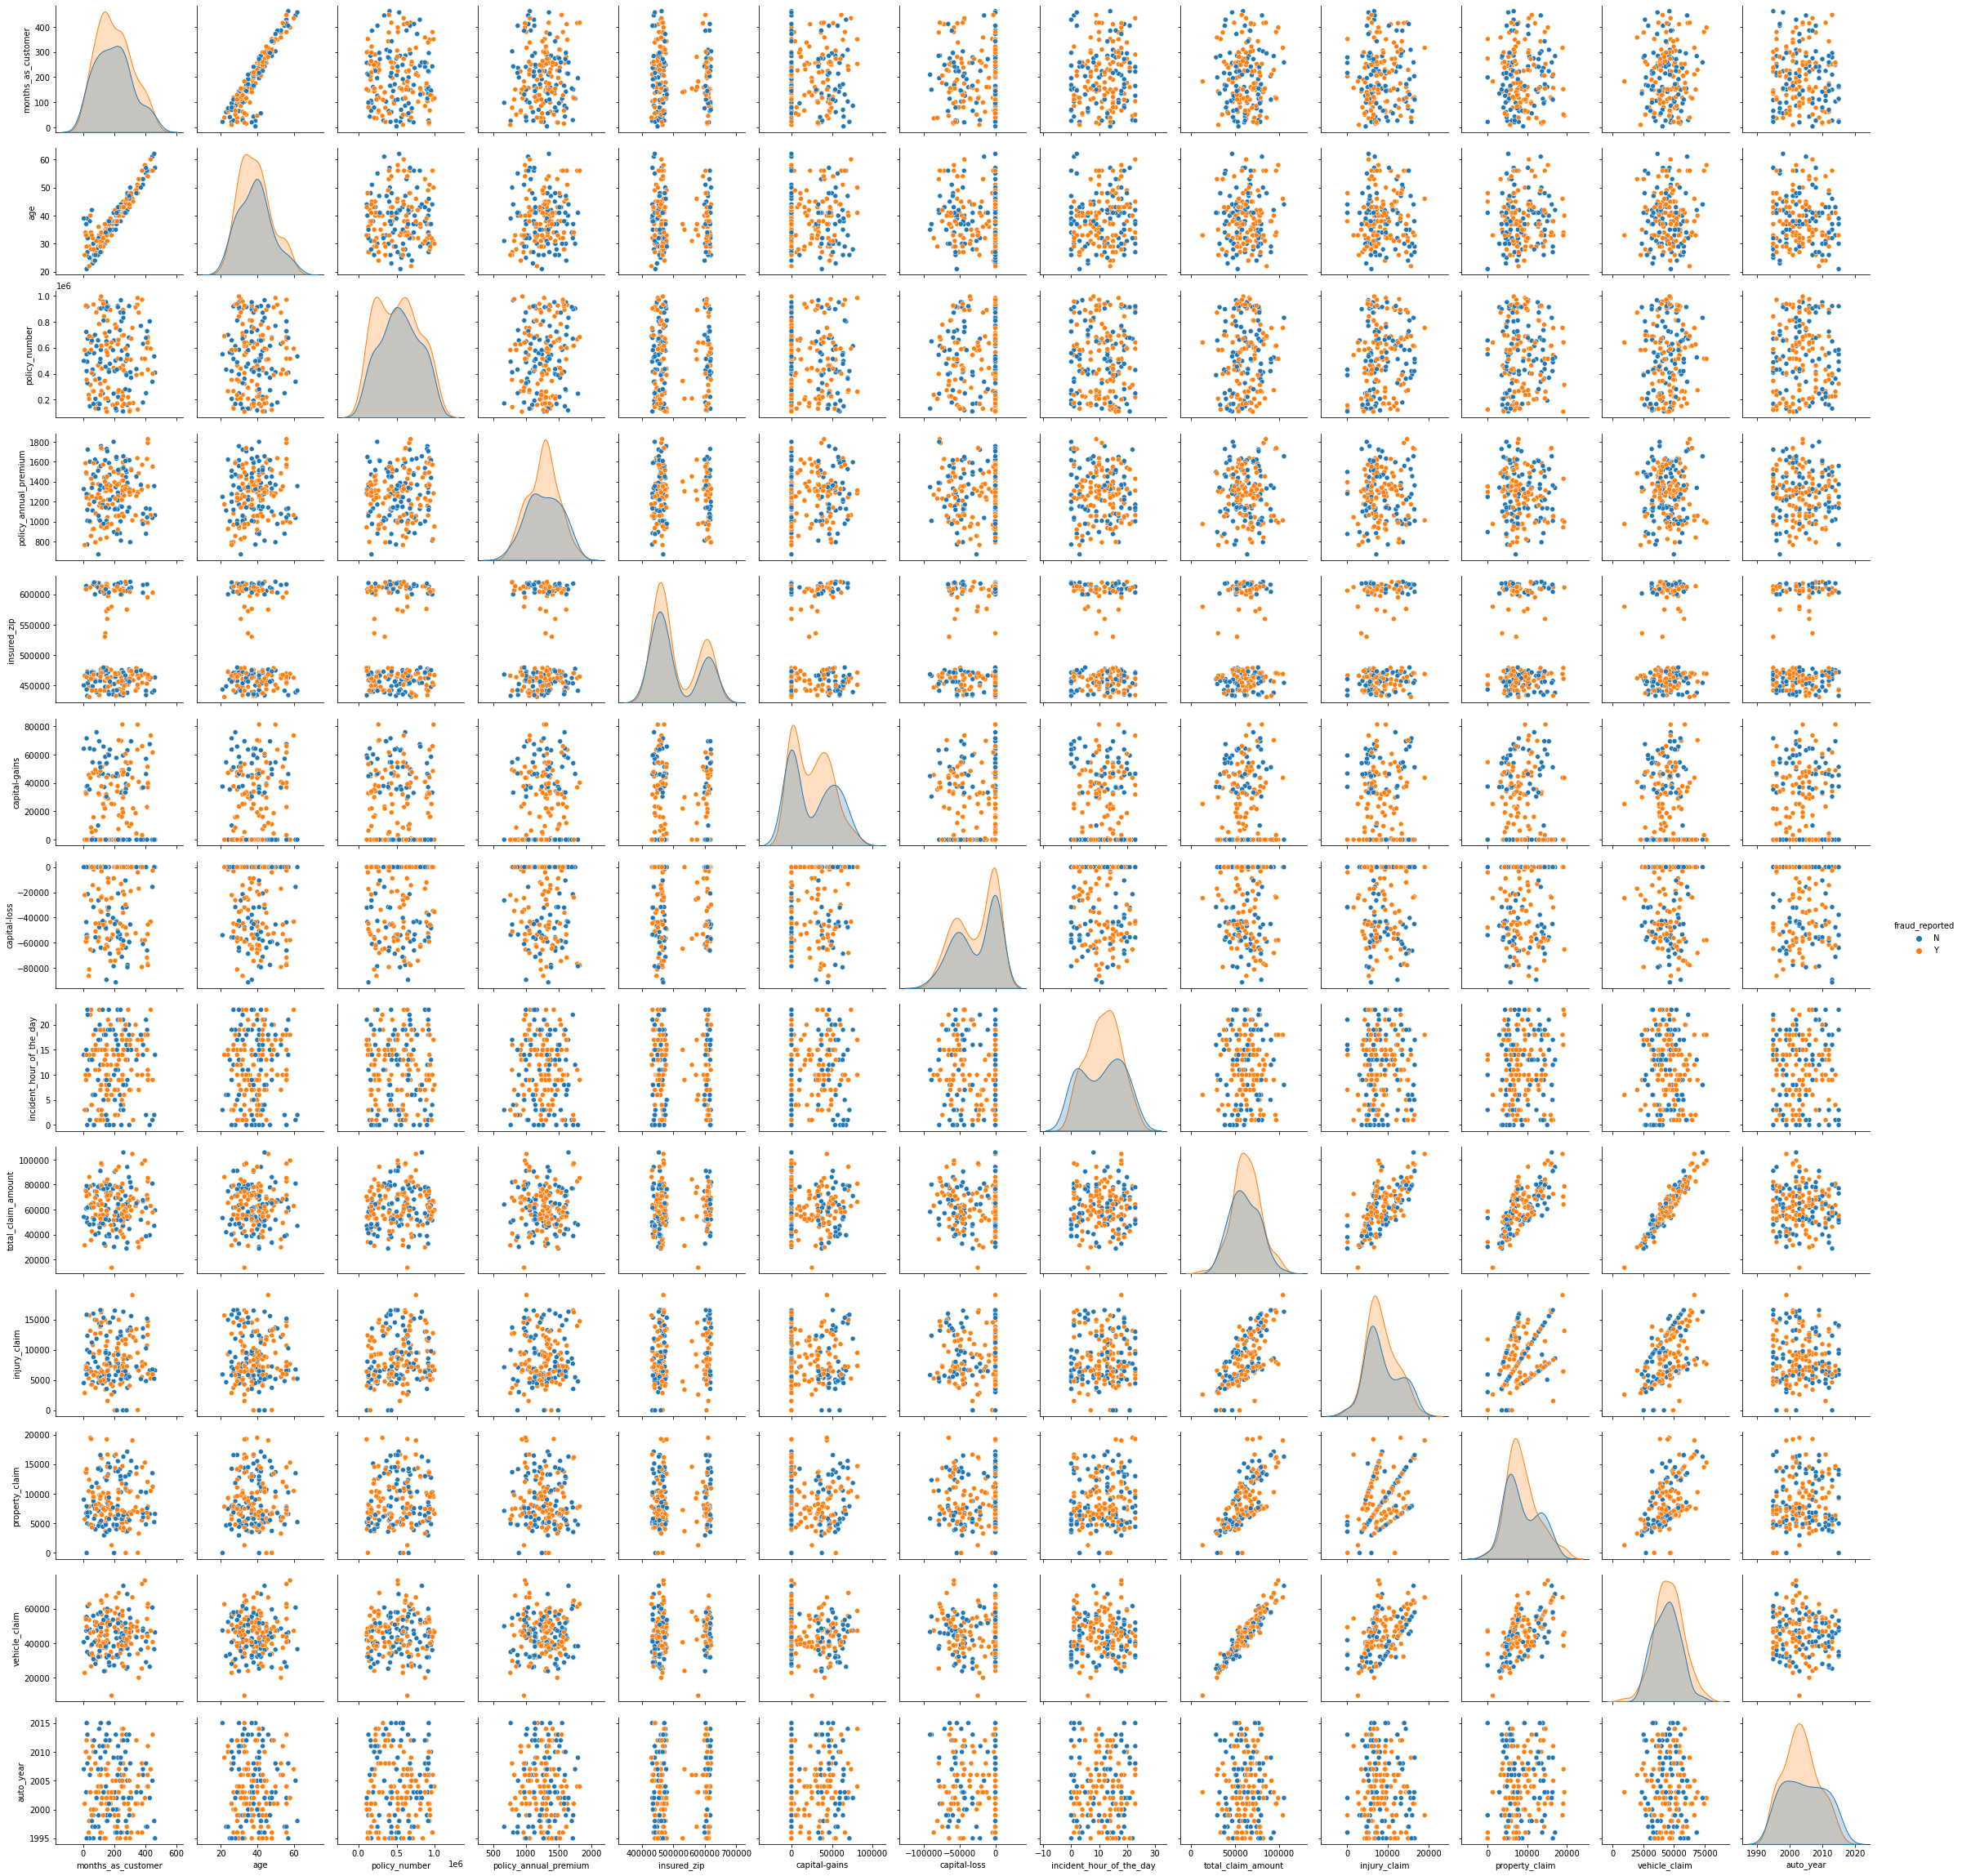

In [31]:
sns.pairplot(
    train_set_smote_cleaned[
        config_data['int32_col']
    ].sample(200),
    hue = config_data['label']
)

## 2.11 Final Heatmap Correlation

<AxesSubplot:>

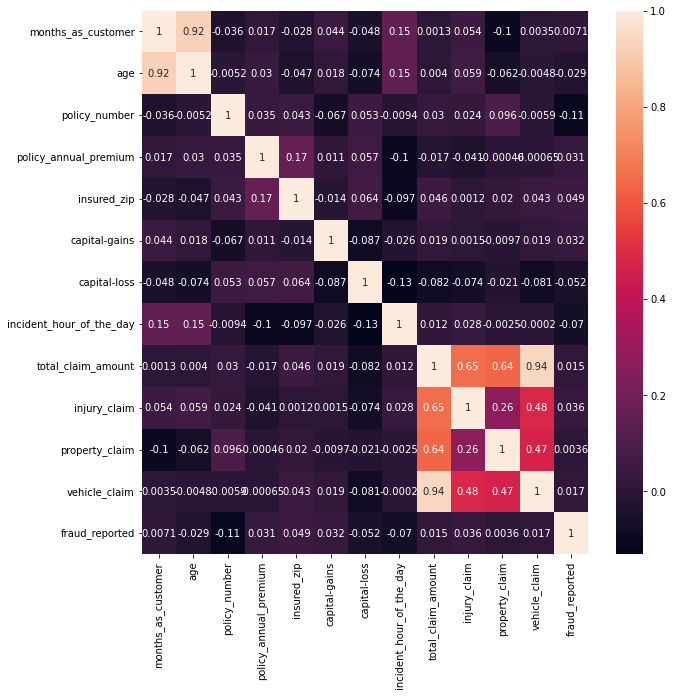

In [140]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(train_set_smote_cleaned.corr(method = "spearman"), annot = True, ax = ax)

## 2.12 Final BoxPlot

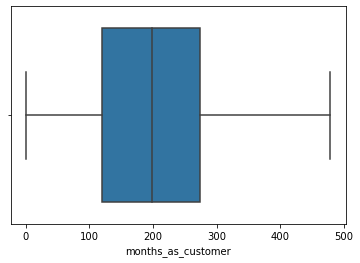

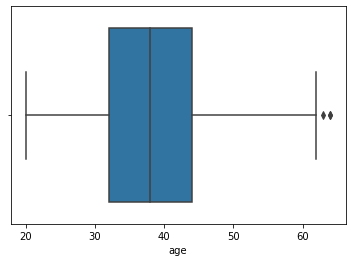

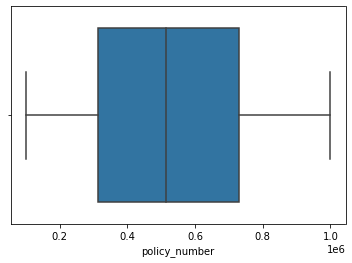

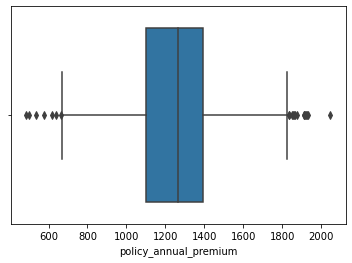

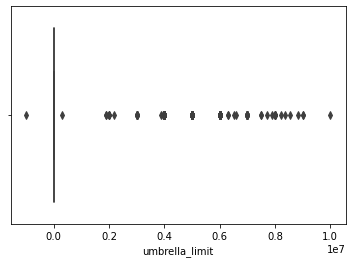

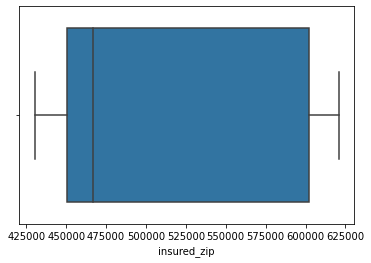

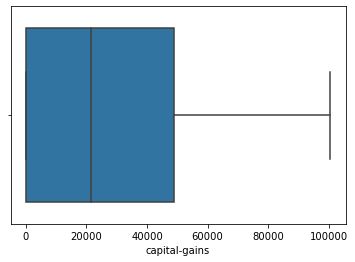

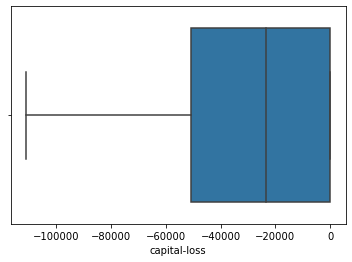

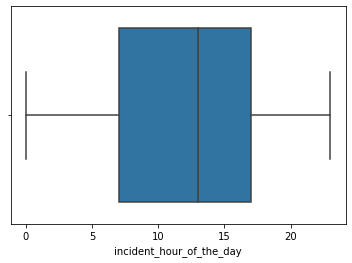

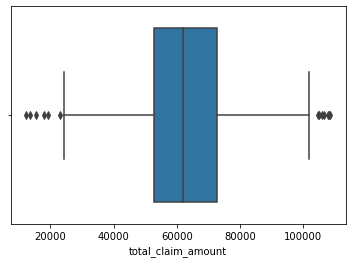

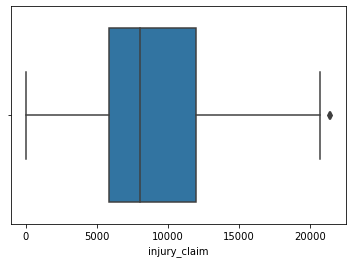

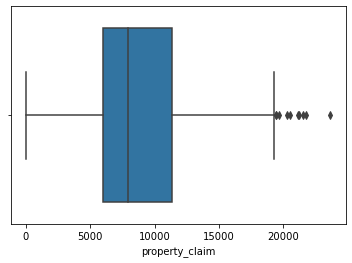

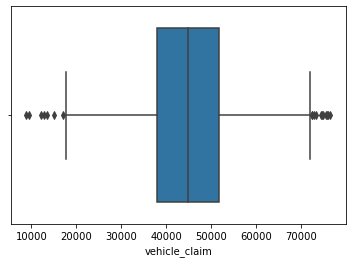

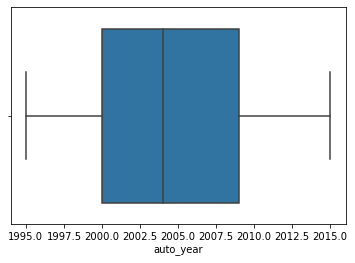

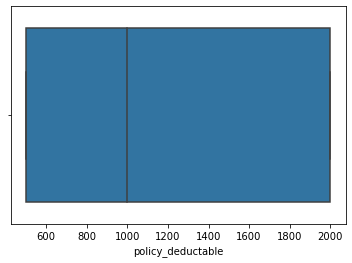

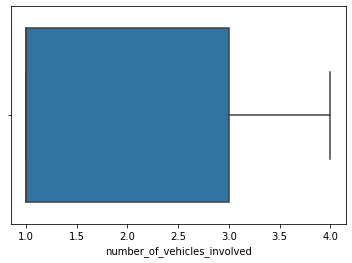

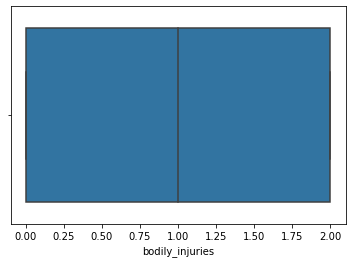

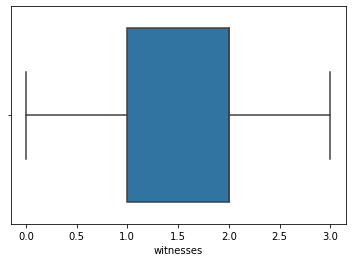

TypeError: Horizontal orientation requires numeric `x` variable.

In [215]:
for col in config_data['int32_col']:
    sns.boxplot(data = train_set_smote_cleaned, x = col)

    plt.show()